In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import asapy

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from sklearn import datasets
from seaborn import load_dataset

# Aprendizado Supervisionado

![Texto alternativo](./figures/flowchart.jpg)

## Classificação

### Caso 1: [Titanic](https://www.kaggle.com/competitions/titanic)

In [2]:
df_titanic = load_dataset('titanic')
df_titanic.drop(columns=['deck', 'age'], inplace=True)

In [3]:
sample_titanic = df_titanic.sample(10)
df_titanic.drop(sample_titanic.index, inplace=True)

In [4]:
df_titanic.head(5)

survived  pclass     sex  sibsp  parch     fare embarked  class    who  \
0         0       3    male      1      0   7.2500        S  Third    man   
1         1       1  female      1      0  71.2833        C  First  woman   
2         1       3  female      0      0   7.9250        S  Third  woman   
3         1       1  female      1      0  53.1000        S  First  woman   
4         0       3    male      0      0   8.0500        S  Third    man   

   adult_male  embark_town alive  alone  
0        True  Southampton    no  False  
1       False    Cherbourg   yes  False  
2       False  Southampton   yes   True  
3       False  Southampton   yes  False  
4        True  Southampton    no   True

#### Rede Neural

##### Uso Simples

In [5]:
nn_titanic = asapy.NeuralNetwork(target="survived")

In [6]:
nn_titanic.build(df_titanic)

In [7]:
nn_titanic.hyperparameter_optimization()

In [8]:
a = nn_titanic.fit()

In [9]:
pred_nn_titanic = nn_titanic.predict(sample_titanic)

Inference time: 143.92 milliseconds (10 register(s))


In [10]:
pred_nn_titanic

pclass     sex  sibsp  parch     fare embarked   class    who  \
191       2    male      0      0  13.0000        S  Second    man   
274       3  female      0      0   7.7500        Q   Third  woman   
110       1    male      0      0  52.0000        S   First    man   
608       2  female      1      2  41.5792        C  Second  woman   
85        3  female      3      0  15.8500        S   Third  woman   
782       1    male      0      0  30.0000        S   First    man   
888       3  female      1      2  23.4500        S   Third  woman   
12        3    male      0      0   8.0500        S   Third    man   
410       3    male      0      0   7.8958        S   Third    man   
561       3    male      0      0   7.8958        S   Third    man   

     adult_male  embark_town alive  alone  survived  survived (NN prediction)  
191        True  Southampton    no   True         0                         0  
274       False   Queenstown   yes   True         1                         1  
110        True  Southampton    no   True         0                         0  
608       False    Cherbourg   yes  False         1                         1  
85        False  Southampton   yes  False         1                         1  
782        True  Southampton    no   True         0                         0  
888       False  Southampton    no  False         0                         0  
12         True  Southampton    no   True         0                         0  
410        True  Southampton    no   True         0                         0  
561        True  Southampton    no   True         0                         0

##### Uso personalizado (uso de argumentos opcionais)

In [11]:
nn_titanic = asapy.NeuralNetwork(target="survived", name='demo_nn_titanic', seed=25)

In [12]:
nn_titanic.build(
    df_titanic,
    task='classification',
    max_cat_nunique = 10,
    split_size = (0.7, 0.15, 0.15),
    info=True,
    patience_early_stopping = 20,
    patience_reduceLR = 4,
    metrics=['auc', 'precision', 'recall', 'accuracy']
)


                Task: classification

                Total of registers: 881
                Total of valid registers: 879
                Total of invalid registers: 2

                Total of training registers: 615
                Total of validation registers: 132
                Total of test registers: 132

                Features before preprocessing: 12
                Features after preprocessing: 24

                Numerical Features: ['pclass', 'sibsp', 'parch', 'fare']
                Categorical Features: ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']
                Categorical Features removed due to high cardinality: []

                Target: ['survived']
            	Cardinality (Target): 2


In [13]:
nn_titanic.hyperparameter_optimization(
    n_trials=5,
    num_folds=5,
    info=True,
    search_space_dropout = [0.0, 0.5],
    search_space_layers = [2, 3, 4],
    search_space_batch_size = [32, 64],
    search_space_optimizer = ['Adam']
)

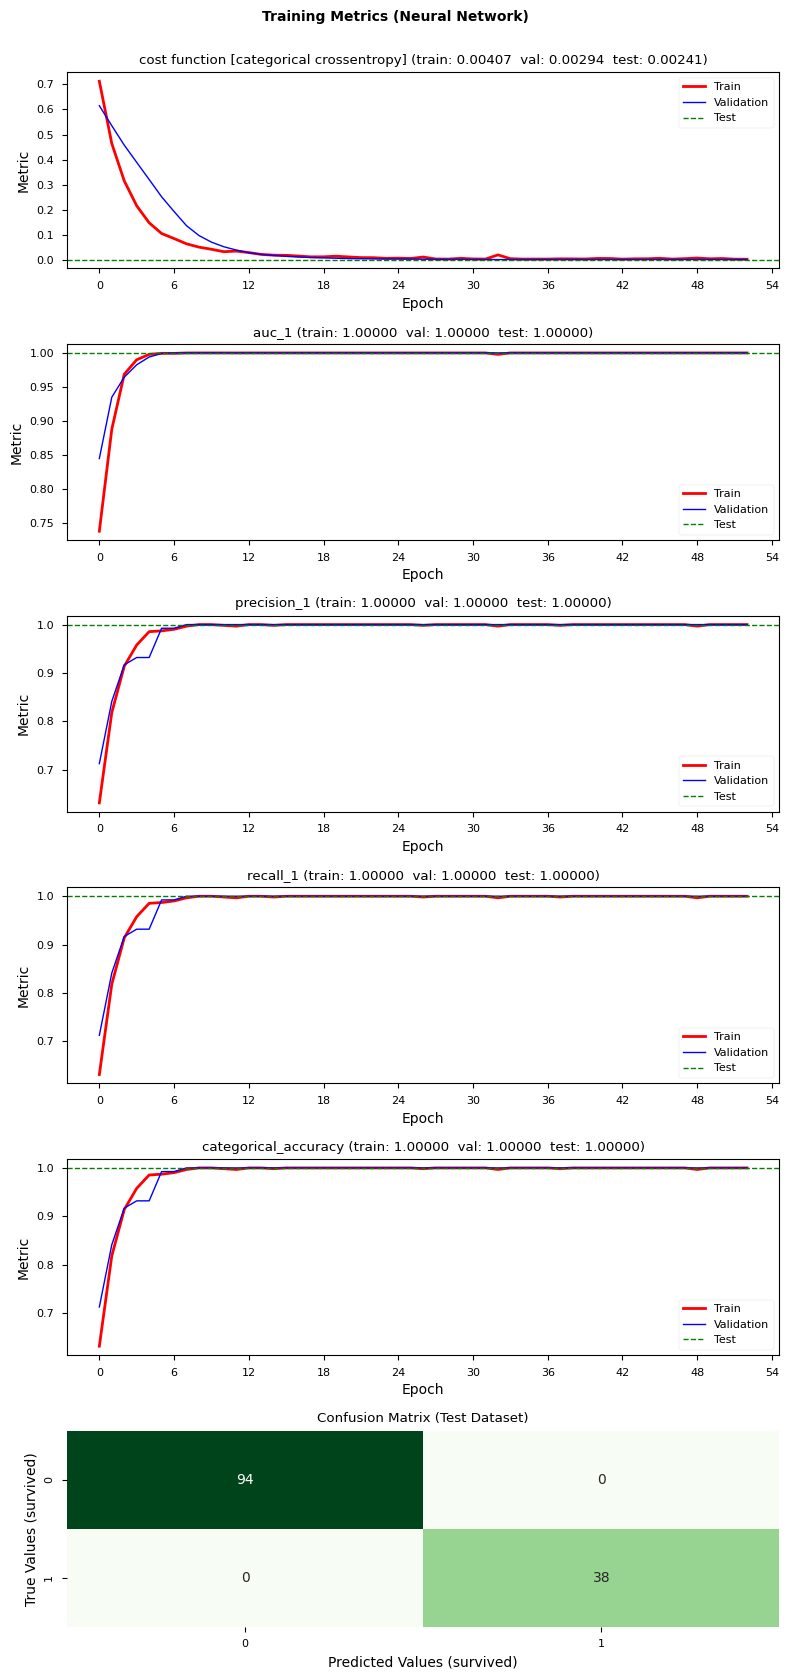

In [14]:
history_nn_titanic = nn_titanic.fit(return_history=True, graph=True, graph_save_extension='png', verbose=0)

In [15]:
pred_nn_titanic = nn_titanic.predict(sample_titanic, verbose=0)

Inference time: 58.60 milliseconds (10 register(s))


In [16]:
pred_nn_titanic

pclass     sex  sibsp  parch     fare embarked   class    who  \
191       2    male      0      0  13.0000        S  Second    man   
274       3  female      0      0   7.7500        Q   Third  woman   
110       1    male      0      0  52.0000        S   First    man   
608       2  female      1      2  41.5792        C  Second  woman   
85        3  female      3      0  15.8500        S   Third  woman   
782       1    male      0      0  30.0000        S   First    man   
888       3  female      1      2  23.4500        S   Third  woman   
12        3    male      0      0   8.0500        S   Third    man   
410       3    male      0      0   7.8958        S   Third    man   
561       3    male      0      0   7.8958        S   Third    man   

     adult_male  embark_town alive  alone  survived  survived (NN prediction)  
191        True  Southampton    no   True         0                         0  
274       False   Queenstown   yes   True         1                         1  
110        True  Southampton    no   True         0                         0  
608       False    Cherbourg   yes  False         1                         1  
85        False  Southampton   yes  False         1                         1  
782        True  Southampton    no   True         0                         0  
888       False  Southampton    no  False         0                         0  
12         True  Southampton    no   True         0                         0  
410        True  Southampton    no   True         0                         0  
561        True  Southampton    no   True         0                         0

##### Salvar modelo treinado

In [17]:
nn_titanic.save()

##### Recuperar modelo treinado

In [18]:
foldername_nn_titanic = 'demo_nn_titanic'

In [19]:
nn_titanic_loaded = asapy.NeuralNetwork(target="survived")

In [20]:
nn_titanic_loaded.load(foldername_nn_titanic)

In [21]:
pred_nn_titanic_loaded = nn_titanic_loaded.predict(sample_titanic, verbose=0)

Inference time: 113.12 milliseconds (10 register(s))


In [22]:
pred_nn_titanic_loaded

pclass     sex  sibsp  parch     fare embarked   class    who  \
191       2    male      0      0  13.0000        S  Second    man   
274       3  female      0      0   7.7500        Q   Third  woman   
110       1    male      0      0  52.0000        S   First    man   
608       2  female      1      2  41.5792        C  Second  woman   
85        3  female      3      0  15.8500        S   Third  woman   
782       1    male      0      0  30.0000        S   First    man   
888       3  female      1      2  23.4500        S   Third  woman   
12        3    male      0      0   8.0500        S   Third    man   
410       3    male      0      0   7.8958        S   Third    man   
561       3    male      0      0   7.8958        S   Third    man   

     adult_male  embark_town alive  alone  survived  survived (NN prediction)  
191        True  Southampton    no   True         0                         0  
274       False   Queenstown   yes   True         1                         1  
110        True  Southampton    no   True         0                         0  
608       False    Cherbourg   yes  False         1                         1  
85        False  Southampton   yes  False         1                         1  
782        True  Southampton    no   True         0                         0  
888       False  Southampton    no  False         0                         0  
12         True  Southampton    no   True         0                         0  
410        True  Southampton    no   True         0                         0  
561        True  Southampton    no   True         0                         0

#### XG Boost

##### Uso Simples

In [23]:
xgb_titanic = asapy.XgBoost(target="survived")

In [24]:
xgb_titanic.build(df_titanic)

In [25]:
xgb_titanic.hyperparameter_optimization()

In [26]:
xgb_titanic.fit()

In [27]:
pred_xgb_titanic = xgb_titanic.predict(sample_titanic)

Inference time: 11.82 milliseconds (10 register(s))


In [28]:
pred_xgb_titanic

pclass     sex  sibsp  parch     fare embarked   class    who  \
191       2    male      0      0  13.0000        S  Second    man   
274       3  female      0      0   7.7500        Q   Third  woman   
110       1    male      0      0  52.0000        S   First    man   
608       2  female      1      2  41.5792        C  Second  woman   
85        3  female      3      0  15.8500        S   Third  woman   
782       1    male      0      0  30.0000        S   First    man   
888       3  female      1      2  23.4500        S   Third  woman   
12        3    male      0      0   8.0500        S   Third    man   
410       3    male      0      0   7.8958        S   Third    man   
561       3    male      0      0   7.8958        S   Third    man   

     adult_male  embark_town alive  alone  survived survived (XGB prediction)  
191        True  Southampton    no   True         0                         0  
274       False   Queenstown   yes   True         1                         1  
110        True  Southampton    no   True         0                         0  
608       False    Cherbourg   yes  False         1                         1  
85        False  Southampton   yes  False         1                         1  
782        True  Southampton    no   True         0                         0  
888       False  Southampton    no  False         0                         0  
12         True  Southampton    no   True         0                         0  
410        True  Southampton    no   True         0                         0  
561        True  Southampton    no   True         0                         0

##### Uso personalizado (uso de argumentos opcionais)

In [29]:
xgb_titanic = asapy.XgBoost(target="survived", name='demo_xgb_titanic', seed=25)

In [30]:
xgb_titanic.build(
    df_titanic,
    task='classification',
    max_cat_nunique = 10,
    split_size = (0.7, 0.15, 0.15),
    info=True,
    patience_early_stopping = 20    
)


                Task: classification

                Total of registers: 881
                Total of valid registers: 879
                Total of invalid registers: 2

                Total of training registers: 615
                Total of validation registers: 132
                Total of test registers: 132

                Features before preprocessing: 12
                Features after preprocessing: 24

                Numerical Features: ['pclass', 'sibsp', 'parch', 'fare']
                Categorical Features: ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']
                Categorical Features removed due to high cardinality: []

                Target: ['survived']
            	Cardinality (Target): 2


In [31]:
xgb_titanic.hyperparameter_optimization(
    n_trials=5,
    num_folds=5,
    info=True,
    search_space_tree_method = ['auto'],
    search_space_booster = ['gbtree', 'gblinear', 'dart'],
    search_space_learning_rate = [0.2, 0.3],
    search_space_min_split_loss = [0],
    search_space_max_depth = [5, 6, 7],
    search_space_min_child_weight = [1],
    search_space_max_delta_step = [0],
    search_space_subsample = [1],
    search_space_sampling_method = ['uniform'],
    search_space_colsample_bytree = [1],
    search_space_colsample_bylevel = [1],
    search_space_colsample_bynode = [1],
    search_space_reg_lambda = [1],
    search_space_reg_alpha = [0],
    search_space_scale_pos_weight = [1],
    search_space_grow_policy = ['depthwise', 'lossguide'],
    search_space_max_leaves = [0],
    search_space_max_bin = [256, 512],
    search_space_num_parallel_tree = [1]
)

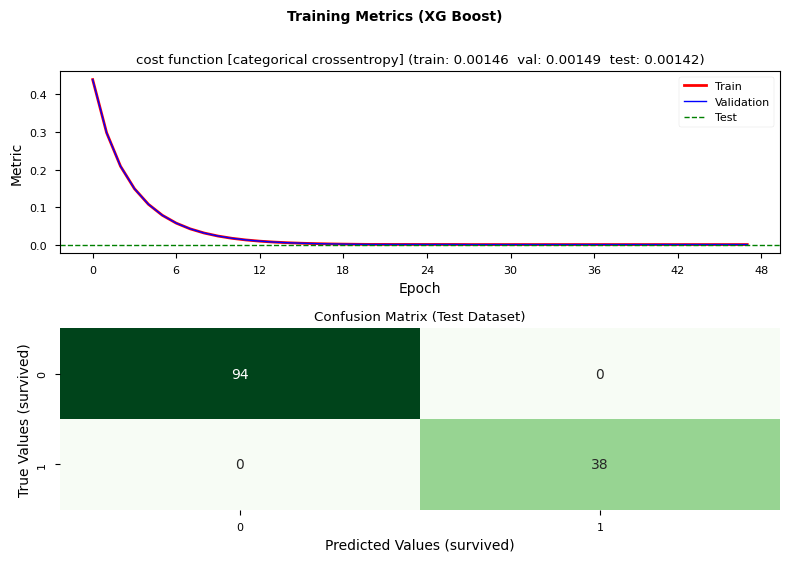

In [32]:
history_xgb_titanic = xgb_titanic.fit(return_history=True, graph=True, graph_save_extension='png', verbose=0)

In [33]:
pred_xgb_titanic = xgb_titanic.predict(sample_titanic)

Inference time: 9.09 milliseconds (10 register(s))


In [34]:
pred_xgb_titanic

pclass     sex  sibsp  parch     fare embarked   class    who  \
191       2    male      0      0  13.0000        S  Second    man   
274       3  female      0      0   7.7500        Q   Third  woman   
110       1    male      0      0  52.0000        S   First    man   
608       2  female      1      2  41.5792        C  Second  woman   
85        3  female      3      0  15.8500        S   Third  woman   
782       1    male      0      0  30.0000        S   First    man   
888       3  female      1      2  23.4500        S   Third  woman   
12        3    male      0      0   8.0500        S   Third    man   
410       3    male      0      0   7.8958        S   Third    man   
561       3    male      0      0   7.8958        S   Third    man   

     adult_male  embark_town alive  alone  survived survived (XGB prediction)  
191        True  Southampton    no   True         0                         0  
274       False   Queenstown   yes   True         1                         1  
110        True  Southampton    no   True         0                         0  
608       False    Cherbourg   yes  False         1                         1  
85        False  Southampton   yes  False         1                         1  
782        True  Southampton    no   True         0                         0  
888       False  Southampton    no  False         0                         0  
12         True  Southampton    no   True         0                         0  
410        True  Southampton    no   True         0                         0  
561        True  Southampton    no   True         0                         0

##### Salvar modelo treinado

In [35]:
xgb_titanic.save()

##### Recuperar modelo treinado

In [36]:
foldername_xgb_titanic = 'demo_xgb_titanic'

In [37]:
xgb_titanic_loaded = asapy.XgBoost(target="survived")

In [38]:
xgb_titanic_loaded.load(foldername_xgb_titanic)

In [39]:
pred_xgb_titanic_loaded = xgb_titanic_loaded.predict(sample_titanic)

Inference time: 7.97 milliseconds (10 register(s))


In [40]:
pred_xgb_titanic_loaded

pclass     sex  sibsp  parch     fare embarked   class    who  \
191       2    male      0      0  13.0000        S  Second    man   
274       3  female      0      0   7.7500        Q   Third  woman   
110       1    male      0      0  52.0000        S   First    man   
608       2  female      1      2  41.5792        C  Second  woman   
85        3  female      3      0  15.8500        S   Third  woman   
782       1    male      0      0  30.0000        S   First    man   
888       3  female      1      2  23.4500        S   Third  woman   
12        3    male      0      0   8.0500        S   Third    man   
410       3    male      0      0   7.8958        S   Third    man   
561       3    male      0      0   7.8958        S   Third    man   

     adult_male  embark_town alive  alone  survived survived (XGB prediction)  
191        True  Southampton    no   True         0                         0  
274       False   Queenstown   yes   True         1                         1  
110        True  Southampton    no   True         0                         0  
608       False    Cherbourg   yes  False         1                         1  
85        False  Southampton   yes  False         1                         1  
782        True  Southampton    no   True         0                         0  
888       False  Southampton    no  False         0                         0  
12         True  Southampton    no   True         0                         0  
410        True  Southampton    no   True         0                         0  
561        True  Southampton    no   True         0                         0

### Caso 2: [MNIST](https://www.kaggle.com/competitions/digit-recognizer)

In [213]:
from tensorflow.keras.datasets import mnist

In [214]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_reshaped = x_train.reshape(-1, x_train.shape[1] * x_train.shape[2])
x_test_reshaped = x_test.reshape(-1, x_train.shape[1] * x_train.shape[2])

df_mnist = pd.DataFrame(x_train_reshaped)
sample_mnist = pd.DataFrame(x_test_reshaped)

df_mnist['label'] = y_train
sample_mnist['label'] = y_test

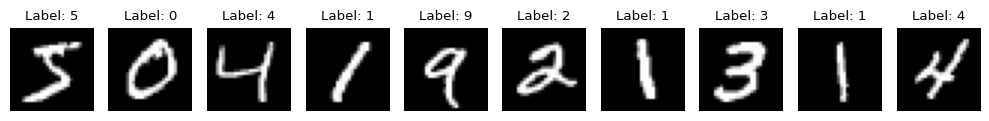

In [215]:
fig, axes = plt.subplots(1, 10, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(df_mnist.iloc[i, :-1].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {df_mnist.iloc[i, -1]}")    
    ax.axis('off')
    
plt.tight_layout()
plt.show()

#### Rede Neural

##### Uso Simples

In [216]:
nn_mnist = asapy.NeuralNetwork(target="label")

In [217]:
nn_mnist.build(df_mnist)

In [218]:
nn_mnist.hyperparameter_optimization()

In [219]:
nn_mnist.fit()

In [220]:
pred_nn_mnist = nn_mnist.predict(sample_mnist)

Inference time: 941.44 milliseconds (10000 register(s))


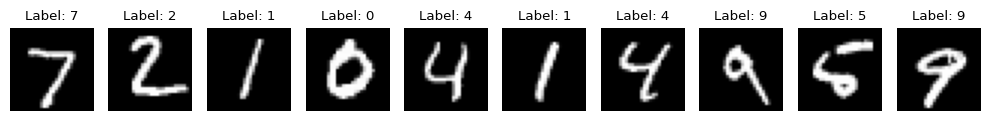

In [221]:
fig, axes = plt.subplots(1, 10, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(pred_nn_mnist.iloc[i, :-2].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {pred_nn_mnist.iloc[i, -1]}")    
    ax.axis('off')
    
plt.tight_layout()
plt.show()

##### Uso personalizado (uso de argumentos opcionais)

In [222]:
nn_mnist = asapy.NeuralNetwork(target="label", name='demo_nn_mnist', seed=25)

In [223]:
nn_mnist.build(
    df_mnist,
    task="classification",
    num_folds=5,
    max_cat_nunique = 10,
    split_size = (0.7, 0.15, 0.15),
    info=True,
    patience_early_stopping = 20,
    patience_reduceLR = 4,
    metrics=['auc', 'precision', 'recall', 'accuracy']
)


                Task: classification

                Total of registers: 60000
                Total of valid registers: 60000
                Total of invalid registers: 0

                Total of training registers: 41999
                Total of validation registers: 9001
                Total of test registers: 9000

                Features before preprocessing: 784
                Features after preprocessing: 784

                Numerical Features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 

In [224]:
nn_mnist.hyperparameter_optimization(
    n_trials=3,
    num_folds=5,
    info=True,
    search_space_dropout = [0, 0.05],
    search_space_layers = [3, 4],
    search_space_batch_size = [32],
    search_space_optimizer = ['Adam']
)

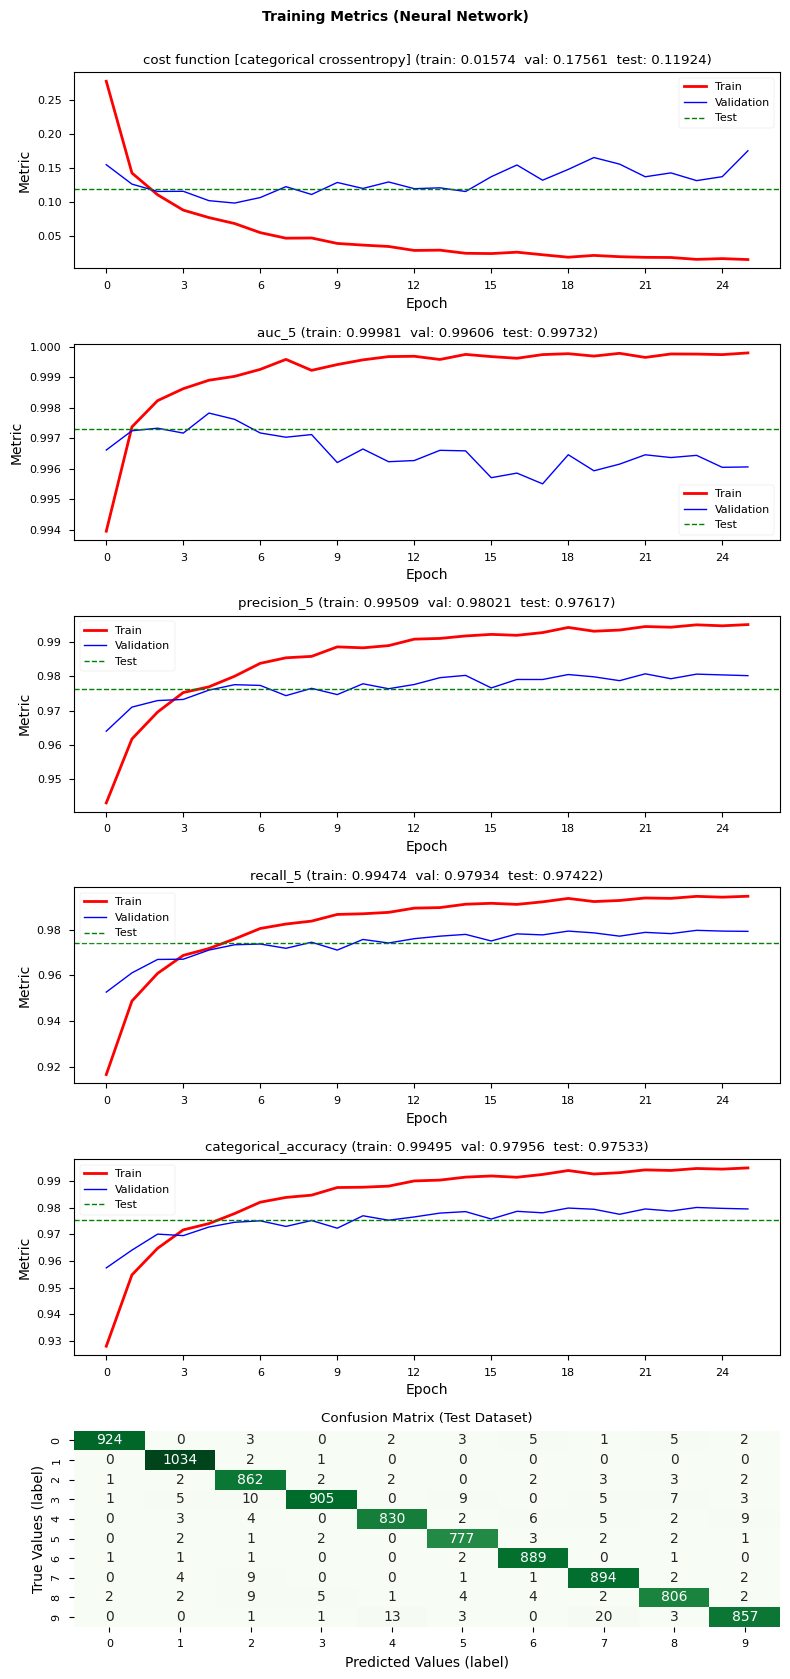

In [225]:
history_nn_mnist = nn_mnist.fit(return_history=True, graph=True, graph_save_extension='png', verbose=0)

In [226]:
pred_nn_mnist = nn_mnist.predict(sample_mnist, verbose=0)

Inference time: 730.75 milliseconds (10000 register(s))


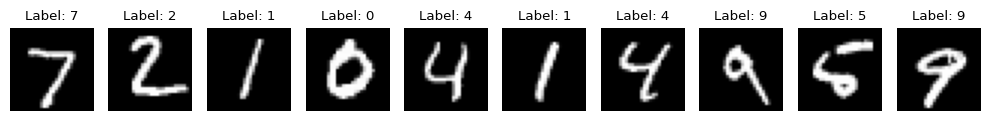

In [227]:
fig, axes = plt.subplots(1, 10, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(pred_nn_mnist.iloc[i, :-2].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {pred_nn_mnist.iloc[i, -1]}")    
    ax.axis('off')
    
plt.tight_layout()
plt.show()

##### Salvar modelo treinado

In [228]:
nn_mnist.save()

##### Recuperar modelo treinado

In [229]:
foldername_nn_mnist = 'demo_nn_mnist'

In [230]:
nn_mnist_loaded = asapy.NeuralNetwork(target="label")

In [231]:
nn_mnist_loaded.load(foldername_nn_mnist)

In [232]:
pred_nn_mnist_loaded = nn_mnist_loaded.predict(sample_mnist, verbose=0)

Inference time: 792.22 milliseconds (10000 register(s))


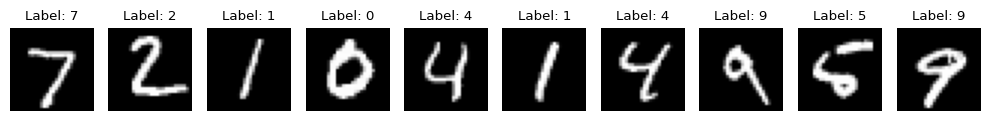

In [233]:
fig, axes = plt.subplots(1, 10, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(pred_nn_mnist_loaded.iloc[i, :-2].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {pred_nn_mnist_loaded.iloc[i, -1]}")    
    ax.axis('off')
    
plt.tight_layout()
plt.show()

#### XG Boost

##### Uso Simples

In [234]:
xgb_mnist = asapy.XgBoost(target="label")

In [235]:
xgb_mnist.build(df_mnist)

In [236]:
xgb_mnist.hyperparameter_optimization()

In [237]:
xgb_mnist.fit()

In [238]:
pred_xgb_mnist = xgb_mnist.predict(sample_mnist)

Inference time: 16196.21 milliseconds (10000 register(s))


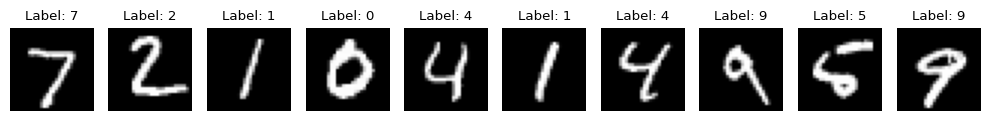

In [239]:
fig, axes = plt.subplots(1, 10, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(pred_xgb_mnist.iloc[i, :-2].values.reshape(28, 28).astype(np.float64), cmap='gray') 
    ax.set_title(f"Label: {pred_xgb_mnist.iloc[i, -1]}")    
    ax.axis('off')
    
plt.tight_layout()
plt.show()

##### Uso personalizado (uso de argumentos opcionais)

In [240]:
xgb_mnist = asapy.XgBoost(target="label", name='demo_xgb_mnist', seed=25)

In [241]:
xgb_mnist.build(
    df_mnist,
    task='classification',
    num_folds=5,
    max_cat_nunique = 10,
    split_size = (0.7, 0.15, 0.15),
    info=True,
    patience_early_stopping = 20
)


                Task: classification

                Total of registers: 60000
                Total of valid registers: 60000
                Total of invalid registers: 0

                Total of training registers: 41999
                Total of validation registers: 9001
                Total of test registers: 9000

                Features before preprocessing: 784
                Features after preprocessing: 784

                Numerical Features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 

In [242]:
xgb_mnist.hyperparameter_optimization(
    n_trials=3,
    num_folds=5,
    info=True,
    search_space_tree_method = ['auto'],
    search_space_booster = ['gbtree', 'gblinear', 'dart'],
    search_space_learning_rate = [0.3],
    search_space_min_split_loss = [0],
    search_space_max_depth = [6],
    search_space_min_child_weight = [1],
    search_space_max_delta_step = [0],
    search_space_subsample = [1],
    search_space_sampling_method = ['uniform'],
    search_space_colsample_bytree = [1],
    search_space_colsample_bylevel = [1],
    search_space_colsample_bynode = [1],
    search_space_reg_lambda = [1],
    search_space_reg_alpha = [0],
    search_space_scale_pos_weight = [1],
    search_space_grow_policy = ['depthwise'],
    search_space_max_leaves = [0],
    search_space_max_bin = [256],
    search_space_num_parallel_tree = [1]
)

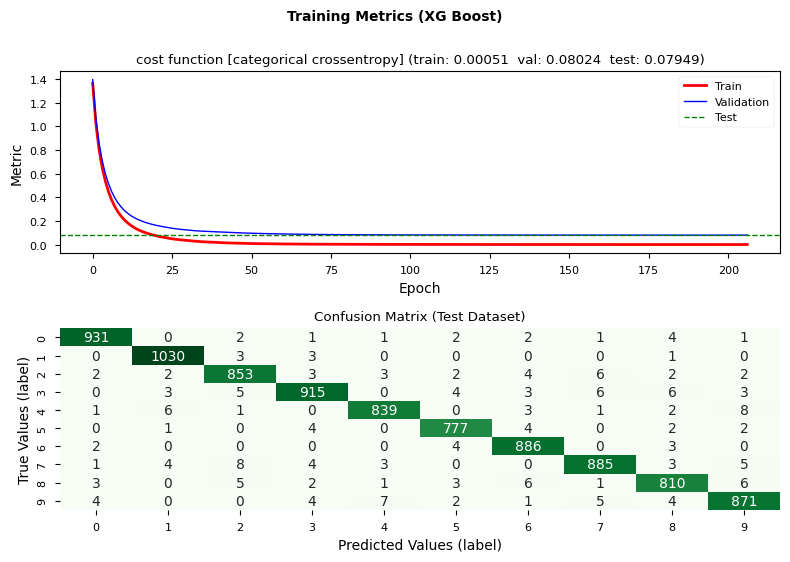

In [243]:
history_xgb_mnist = xgb_mnist.fit(return_history=True, graph=True, graph_save_extension='png', verbose=0)

In [244]:
pred_xgb_mnist = xgb_mnist.predict(sample_mnist)

Inference time: 127.52 milliseconds (10000 register(s))


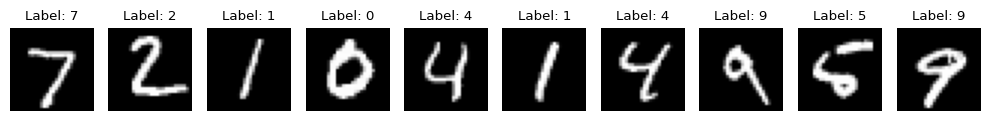

In [245]:
fig, axes = plt.subplots(1, 10, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(pred_xgb_mnist.iloc[i, :-2].values.reshape(28, 28).astype(np.float64), cmap='gray')
    ax.set_title(f"Label: {pred_xgb_mnist.iloc[i, -1]}")    
    ax.axis('off')
    
plt.tight_layout()
plt.show()

##### Salvar modelo treinado

In [246]:
xgb_mnist.save()

##### Recuperar modelo treinado

In [247]:
foldername_xgb_mnist = 'demo_xgb_mnist'

In [248]:
xgb_mnist_loaded = asapy.XgBoost(target="label")

In [249]:
xgb_mnist_loaded.load(foldername_xgb_mnist)

In [250]:
pred_xgb_mnist_loaded = xgb_mnist_loaded.predict(sample_mnist)

Inference time: 102.91 milliseconds (10000 register(s))


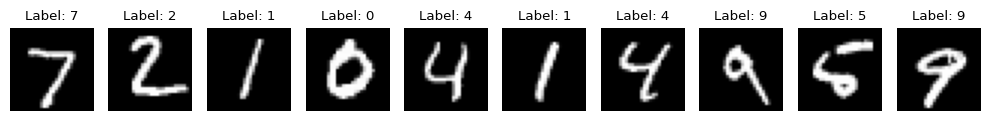

In [251]:
fig, axes = plt.subplots(1, 10, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(pred_xgb_mnist_loaded.iloc[i, :-2].values.reshape(28, 28).astype(np.float64), cmap='gray')
    ax.set_title(f"Label: {pred_xgb_mnist_loaded.iloc[i, -1]}")    
    ax.axis('off')
    
plt.tight_layout()
plt.show()

## Regressão

### Caso 3: [California housing](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [41]:
housing = datasets.fetch_california_housing()

In [42]:
df_house = pd.DataFrame(housing.data, columns=housing.feature_names)
df_house['MedHouseVal'] = housing.target

In [43]:
sample_house = df_house.sample(10)
df_house.drop(sample_house.index, inplace=True)

In [44]:
df_house.head(5)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

#### Rede Neural

##### Uso Simples

In [45]:
nn_house = asapy.NeuralNetwork(target="MedHouseVal")

In [46]:
nn_house.build(df_house)

In [47]:
nn_house.hyperparameter_optimization()

In [48]:
nn_house.fit()

In [49]:
pred_nn_house = nn_house.predict(sample_house)

Inference time: 96.59 milliseconds (10 register(s))


In [50]:
pred_nn_house

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20011  2.1477      27.0  4.968454   1.012618      1063.0  3.353312     36.05   
16553  5.1047       9.0  6.528042   1.014815      3378.0  3.574603     37.82   
5238   1.3000      36.0  4.245763   1.042373       487.0  4.127119     33.93   
7117   5.4236      35.0  5.468672   0.977444      1248.0  3.127820     33.91   
9622   2.3382      38.0  5.142857   1.160714       478.0  4.267857     37.29   
575    3.1972      20.0  3.546012   1.119632       583.0  1.788344     37.75   
7121   4.7861      34.0  5.980998   1.019002      1309.0  3.109264     33.91   
10312  8.9088       7.0  8.014003   0.996705      4160.0  3.426689     33.89   
1777   2.3456      45.0  4.672566   1.090708      1406.0  3.110619     37.94   
8926   3.2061      41.0  3.868263   1.112275      1058.0  1.583832     34.00   

       Longitude  MedHouseVal  MedHouseVal (NN prediction)  
20011    -119.12        0.539                     1.045721  
16553    -121.24        1.579                     1.649565  
5238     -118.23        0.870                     1.321314  
7117     -118.02        2.167                     2.576593  
9622     -120.32        0.596                     1.015833  
575      -122.28        1.000                     2.338480  
7121     -118.02        2.107                     2.317239  
10312    -117.78        4.153                     3.457448  
1777     -122.35        1.052                     1.533222  
8926     -118.48        3.700                     2.863523

##### Uso personalizado (uso de argumentos opcionais)

In [51]:
nn_house = asapy.NeuralNetwork(target="MedHouseVal", name='demo_nn_house', seed=25)

In [52]:
nn_house.build(
    df_house,
    task="regression",
    max_cat_nunique = 10,
    split_size = (0.7, 0.15, 0.15),
    info=True,
    patience_early_stopping = 20,
    patience_reduceLR = 4,
    metrics=['mse', 'rmse', 'msle', 'mae', 'mape']
)


                Task: regression

                Total of registers: 20630
                Total of valid registers: 20630
                Total of invalid registers: 0

                Total of training registers: 14440
                Total of validation registers: 3095
                Total of test registers: 3095

                Features before preprocessing: 8
                Features after preprocessing: 8

                Numerical Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []

                Target: ['MedHouseVal']
            


In [53]:
nn_house.hyperparameter_optimization(
    n_trials=5,
    num_folds=5,
    info=True,
    search_space_dropout = [0.0, 0.5],
    search_space_layers = [3, 4],
    search_space_batch_size = [32, 64],
    search_space_optimizer = ['Adam']
)

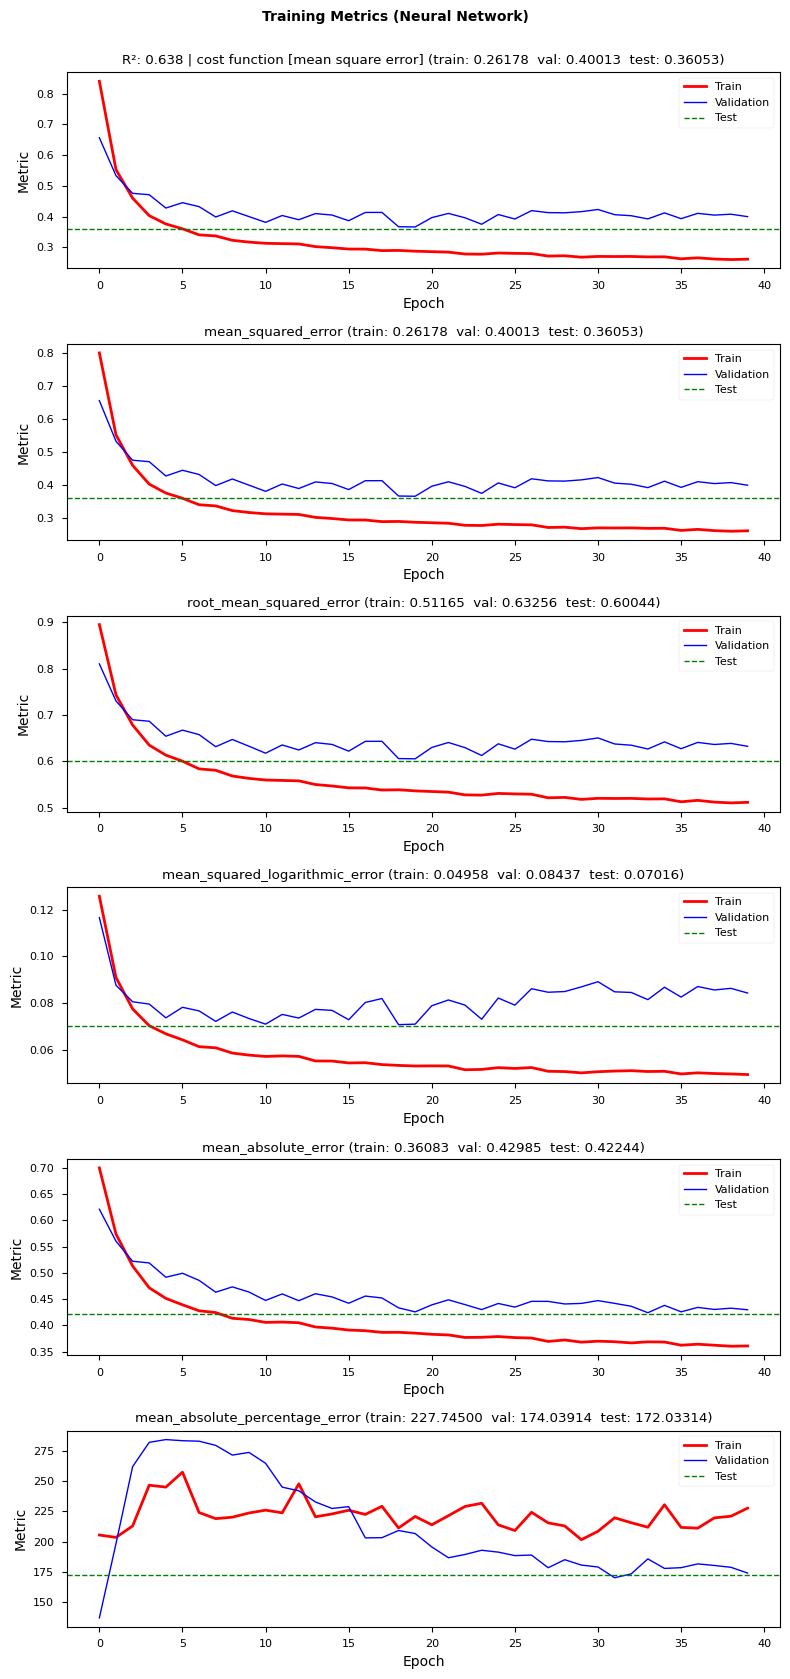

In [54]:
history_nn_house = nn_house.fit(return_history=True, graph=True, graph_save_extension='png', verbose=0)

In [55]:
pred_nn_house = nn_house.predict(sample_house, verbose=0)

Inference time: 46.94 milliseconds (10 register(s))


In [56]:
pred_nn_house

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20011  2.1477      27.0  4.968454   1.012618      1063.0  3.353312     36.05   
16553  5.1047       9.0  6.528042   1.014815      3378.0  3.574603     37.82   
5238   1.3000      36.0  4.245763   1.042373       487.0  4.127119     33.93   
7117   5.4236      35.0  5.468672   0.977444      1248.0  3.127820     33.91   
9622   2.3382      38.0  5.142857   1.160714       478.0  4.267857     37.29   
575    3.1972      20.0  3.546012   1.119632       583.0  1.788344     37.75   
7121   4.7861      34.0  5.980998   1.019002      1309.0  3.109264     33.91   
10312  8.9088       7.0  8.014003   0.996705      4160.0  3.426689     33.89   
1777   2.3456      45.0  4.672566   1.090708      1406.0  3.110619     37.94   
8926   3.2061      41.0  3.868263   1.112275      1058.0  1.583832     34.00   

       Longitude  MedHouseVal  MedHouseVal (NN prediction)  
20011    -119.12        0.539                     0.981598  
16553    -121.24        1.579                     1.716521  
5238     -118.23        0.870                     1.264716  
7117     -118.02        2.167                     2.796965  
9622     -120.32        0.596                     1.069015  
575      -122.28        1.000                     1.890667  
7121     -118.02        2.107                     2.503593  
10312    -117.78        4.153                     3.285469  
1777     -122.35        1.052                     1.517190  
8926     -118.48        3.700                     2.783714

##### Salvar modelo treinado

In [57]:
nn_house.save()

##### Recuperar modelo treinado

In [58]:
foldername_nn_house = 'demo_nn_house'

In [59]:
nn_house_loaded = asapy.NeuralNetwork(target="MedHouseVal")

In [60]:
nn_house_loaded.load(foldername_nn_house)

In [61]:
pred_nn_house_loaded = nn_house_loaded.predict(sample_house, verbose=0)

Inference time: 102.37 milliseconds (10 register(s))


In [62]:
pred_nn_house_loaded

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20011  2.1477      27.0  4.968454   1.012618      1063.0  3.353312     36.05   
16553  5.1047       9.0  6.528042   1.014815      3378.0  3.574603     37.82   
5238   1.3000      36.0  4.245763   1.042373       487.0  4.127119     33.93   
7117   5.4236      35.0  5.468672   0.977444      1248.0  3.127820     33.91   
9622   2.3382      38.0  5.142857   1.160714       478.0  4.267857     37.29   
575    3.1972      20.0  3.546012   1.119632       583.0  1.788344     37.75   
7121   4.7861      34.0  5.980998   1.019002      1309.0  3.109264     33.91   
10312  8.9088       7.0  8.014003   0.996705      4160.0  3.426689     33.89   
1777   2.3456      45.0  4.672566   1.090708      1406.0  3.110619     37.94   
8926   3.2061      41.0  3.868263   1.112275      1058.0  1.583832     34.00   

       Longitude  MedHouseVal  MedHouseVal (NN prediction)  
20011    -119.12        0.539                     0.981598  
16553    -121.24        1.579                     1.716521  
5238     -118.23        0.870                     1.264716  
7117     -118.02        2.167                     2.796965  
9622     -120.32        0.596                     1.069015  
575      -122.28        1.000                     1.890667  
7121     -118.02        2.107                     2.503593  
10312    -117.78        4.153                     3.285469  
1777     -122.35        1.052                     1.517190  
8926     -118.48        3.700                     2.783714

#### XG Boost

##### Uso Simples

In [63]:
xgb_house = asapy.XgBoost(target="MedHouseVal")

In [64]:
xgb_house.build(df_house)

In [65]:
xgb_house.hyperparameter_optimization()

In [66]:
xgb_house.fit()

In [67]:
pred_xgb_house = xgb_house.predict(sample_house)

Inference time: 123.80 milliseconds (10 register(s))


In [68]:
pred_xgb_house

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20011  2.1477      27.0  4.968454   1.012618      1063.0  3.353312     36.05   
16553  5.1047       9.0  6.528042   1.014815      3378.0  3.574603     37.82   
5238   1.3000      36.0  4.245763   1.042373       487.0  4.127119     33.93   
7117   5.4236      35.0  5.468672   0.977444      1248.0  3.127820     33.91   
9622   2.3382      38.0  5.142857   1.160714       478.0  4.267857     37.29   
575    3.1972      20.0  3.546012   1.119632       583.0  1.788344     37.75   
7121   4.7861      34.0  5.980998   1.019002      1309.0  3.109264     33.91   
10312  8.9088       7.0  8.014003   0.996705      4160.0  3.426689     33.89   
1777   2.3456      45.0  4.672566   1.090708      1406.0  3.110619     37.94   
8926   3.2061      41.0  3.868263   1.112275      1058.0  1.583832     34.00   

       Longitude  MedHouseVal  MedHouseVal (XGB prediction)  
20011    -119.12        0.539                      0.690361  
16553    -121.24        1.579                      1.808061  
5238     -118.23        0.870                      0.834614  
7117     -118.02        2.167                      1.995471  
9622     -120.32        0.596                      0.716565  
575      -122.28        1.000                      1.826532  
7121     -118.02        2.107                      2.152314  
10312    -117.78        4.153                      4.216033  
1777     -122.35        1.052                      0.956737  
8926     -118.48        3.700                      4.494401

##### Uso Avançado (uso de argumentos opcionais)

In [69]:
xgb_house = asapy.XgBoost(target="MedHouseVal", name='demo_xgb_house', seed=25)

In [70]:
xgb_house.build(
    df_house,
    task="regression",
    max_cat_nunique = 10,
    split_size = (0.7, 0.15, 0.15),
    info=True,
    patience_early_stopping = 20
)


                Task: regression

                Total of registers: 20630
                Total of valid registers: 20630
                Total of invalid registers: 0

                Total of training registers: 14440
                Total of validation registers: 3095
                Total of test registers: 3095

                Features before preprocessing: 8
                Features after preprocessing: 8

                Numerical Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []

                Target: ['MedHouseVal']
            


In [71]:
xgb_house.hyperparameter_optimization(
    n_trials=5,
    num_folds = 5, 
    info=True,
    search_space_tree_method = ['auto'],
    search_space_booster = ['gbtree', 'gblinear', 'dart'],
    search_space_learning_rate = [0.1, 0.3],
    search_space_min_split_loss = [0],
    search_space_max_depth = [6],
    search_space_min_child_weight = [1],
    search_space_max_delta_step = [0],
    search_space_subsample = [1],
    search_space_sampling_method = ['uniform'],
    search_space_colsample_bytree = [1],
    search_space_colsample_bylevel = [1],
    search_space_colsample_bynode = [1],
    search_space_reg_lambda = [1],
    search_space_reg_alpha = [0],
    search_space_scale_pos_weight = [1],
    search_space_grow_policy = ['depthwise', 'lossguide'],
    search_space_max_leaves = [0],
    search_space_max_bin = [256, 512],
    search_space_num_parallel_tree = [1]
)

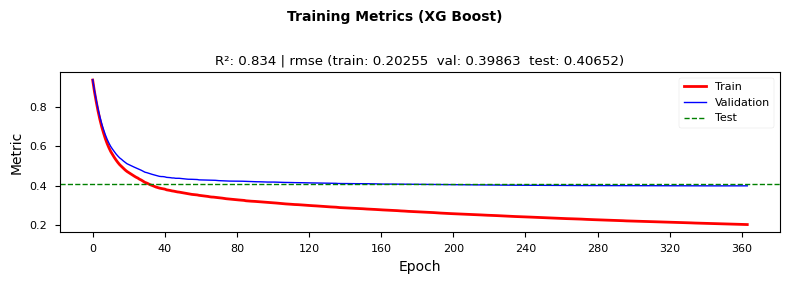

In [72]:
history_xgb_house = xgb_house.fit(return_history=True, graph=True, graph_save_extension='png', verbose=0)

In [73]:
pred_xgb_house = xgb_house.predict(sample_house)

Inference time: 6.01 milliseconds (10 register(s))


In [74]:
pred_xgb_house

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20011  2.1477      27.0  4.968454   1.012618      1063.0  3.353312     36.05   
16553  5.1047       9.0  6.528042   1.014815      3378.0  3.574603     37.82   
5238   1.3000      36.0  4.245763   1.042373       487.0  4.127119     33.93   
7117   5.4236      35.0  5.468672   0.977444      1248.0  3.127820     33.91   
9622   2.3382      38.0  5.142857   1.160714       478.0  4.267857     37.29   
575    3.1972      20.0  3.546012   1.119632       583.0  1.788344     37.75   
7121   4.7861      34.0  5.980998   1.019002      1309.0  3.109264     33.91   
10312  8.9088       7.0  8.014003   0.996705      4160.0  3.426689     33.89   
1777   2.3456      45.0  4.672566   1.090708      1406.0  3.110619     37.94   
8926   3.2061      41.0  3.868263   1.112275      1058.0  1.583832     34.00   

       Longitude  MedHouseVal  MedHouseVal (XGB prediction)  
20011    -119.12        0.539                      0.587766  
16553    -121.24        1.579                      1.715353  
5238     -118.23        0.870                      0.896356  
7117     -118.02        2.167                      2.167106  
9622     -120.32        0.596                      0.739279  
575      -122.28        1.000                      2.127570  
7121     -118.02        2.107                      2.239148  
10312    -117.78        4.153                      4.397825  
1777     -122.35        1.052                      0.849685  
8926     -118.48        3.700                      4.541961

##### Salvar modelo treinado

In [75]:
xgb_house.save()

##### Recuperar modelo treinado

In [76]:
foldername_xgb_house = 'demo_xgb_house'

In [77]:
xgb_house_loaded = asapy.XgBoost(target="MedHouseVal")

In [78]:
xgb_house_loaded.load(foldername_xgb_house)

In [79]:
pred_xgb_house_loaded = xgb_house_loaded.predict(sample_house)

Inference time: 3.36 milliseconds (10 register(s))


In [80]:
pred_xgb_house_loaded

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20011  2.1477      27.0  4.968454   1.012618      1063.0  3.353312     36.05   
16553  5.1047       9.0  6.528042   1.014815      3378.0  3.574603     37.82   
5238   1.3000      36.0  4.245763   1.042373       487.0  4.127119     33.93   
7117   5.4236      35.0  5.468672   0.977444      1248.0  3.127820     33.91   
9622   2.3382      38.0  5.142857   1.160714       478.0  4.267857     37.29   
575    3.1972      20.0  3.546012   1.119632       583.0  1.788344     37.75   
7121   4.7861      34.0  5.980998   1.019002      1309.0  3.109264     33.91   
10312  8.9088       7.0  8.014003   0.996705      4160.0  3.426689     33.89   
1777   2.3456      45.0  4.672566   1.090708      1406.0  3.110619     37.94   
8926   3.2061      41.0  3.868263   1.112275      1058.0  1.583832     34.00   

       Longitude  MedHouseVal  MedHouseVal (XGB prediction)  
20011    -119.12        0.539                      0.587766  
16553    -121.24        1.579                      1.715353  
5238     -118.23        0.870                      0.896356  
7117     -118.02        2.167                      2.167106  
9622     -120.32        0.596                      0.739279  
575      -122.28        1.000                      2.127570  
7121     -118.02        2.107                      2.239148  
10312    -117.78        4.153                      4.397825  
1777     -122.35        1.052                      0.849685  
8926     -118.48        3.700                      4.541961

# Aprendizado Não Supervisionado

### Caso 4: Dispersão Bidimensional de Pontos

In [81]:
X_moons, _ = datasets.make_moons(n_samples=300, noise=0.1, random_state=0)
df_moons = pd.DataFrame(X_moons, columns=['Feature 1', 'Feature 2'])

In [82]:
X_circles, _ = datasets.make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=0)
df_circles = pd.DataFrame(X_circles, columns=['Feature 1', 'Feature 2'])

In [83]:
X_blobs, _ = datasets.make_blobs(n_samples=300, centers=[[-1, -1], [1, 1]], cluster_std=0.5, random_state=0)
df_blobs = pd.DataFrame(X_blobs, columns=['Feature 1', 'Feature 2'])

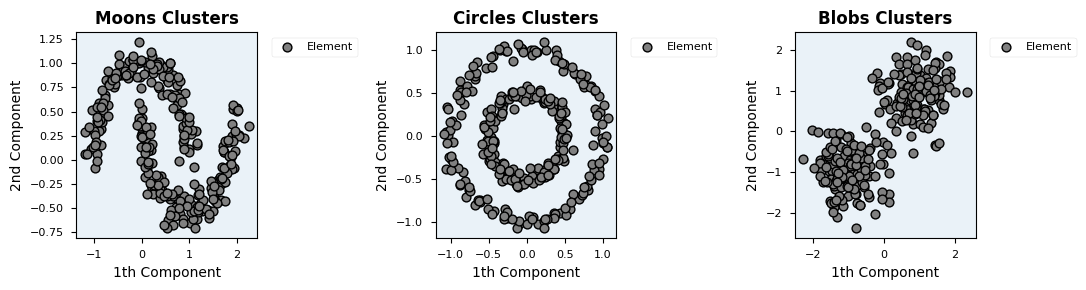

In [84]:
fig = plt.figure(figsize=(11, 3))

titles = ['Moons Clusters', 'Circles Clusters', 'Blobs Clusters']

_datasets = [X_moons, X_circles, X_blobs]

for i, (title, dataset) in enumerate(zip(titles, _datasets), start=1):
    ax = fig.add_subplot(1, 3, i)
    ax.set_facecolor('#EAF2F8')
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.scatter(dataset[:, 0], dataset[:, 1], edgecolor='k', color='gray', s=40, linewidths=1, marker='o', label='Element')
    ax.set_xlabel('1th Component', fontsize=10)
    ax.set_ylabel('2nd Component', fontsize=10)
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), frameon=True, framealpha=0.9, facecolor='white')

plt.tight_layout()
plt.show()
plt.close()

#### DBSCAN

##### Uso Simples

###### Dataset Moons

In [85]:
dbscan_moons = asapy.DBSCAN()

In [86]:
dbscan_moons.build(df_moons)

In [87]:
dbscan_moons.hyperparameter_optimization()

In [88]:
dbscan_moons.fit()

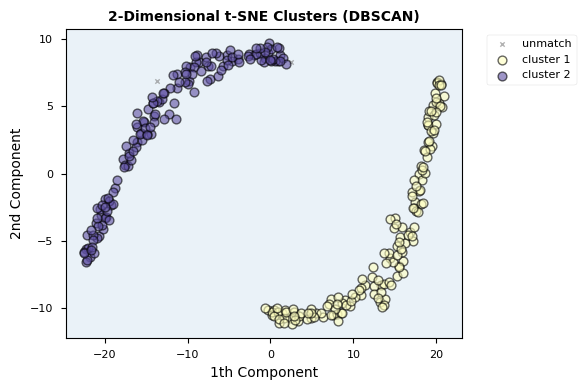

In [89]:
dbscan_moons.predict()

###### Dataset Circles

In [90]:
dbscan_circles = asapy.DBSCAN()

In [91]:
dbscan_circles.build(df_circles)

In [92]:
dbscan_circles.hyperparameter_optimization()

In [93]:
dbscan_circles.fit()

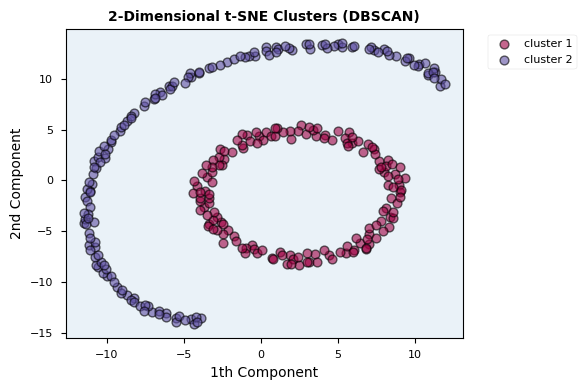

In [94]:
dbscan_circles.predict()

###### Dataset Blobs

In [95]:
dbscan_blobs = asapy.DBSCAN()

In [96]:
dbscan_blobs.build(df_blobs)

In [97]:
dbscan_blobs.hyperparameter_optimization()

In [98]:
dbscan_blobs.fit()

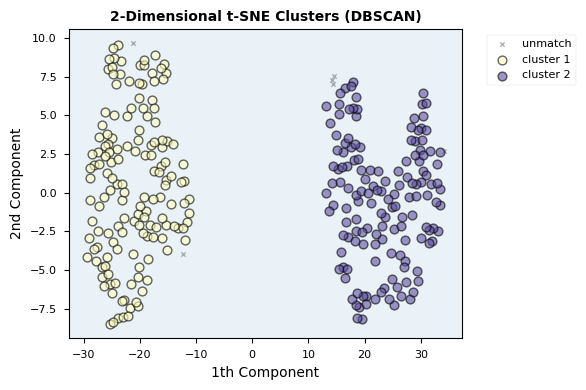

In [99]:
dbscan_blobs.predict()

##### Uso personalizado (uso de argumentos opcionais)

###### Dataset Moons

In [100]:
dbscan_moons = asapy.DBSCAN(name='demo_dbscan_moons', seed=25)

In [101]:
dbscan_moons.build(df_moons, info=True)


                Total of registers: 300
                Total of valid registers: 300
                Total of invalid registers: 0

                Total of Features: 2
                Numerical Features: ['Feature 1', 'Feature 2']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []
            


In [102]:
dbscan_moons.hyperparameter_optimization(
    n_trials=100,
    info=True,
    search_space_eps = [0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 1],
    search_space_min_samples = [3, 4, 5, 6, 7],
    search_space_algorithm = ['auto'],
    search_space_leaf_size = [10, 20, 30, 40, 50],
    search_space_p = [2]
)

Trial (nº)  Silhouette Score params_algorithm  params_eps  \
Ranking                                                              
1º               99          0.255727             auto         0.3   
2º               42          0.255727             auto         0.3   
3º               31          0.255727             auto         0.3   
4º               74          0.255727             auto         0.3   
5º               33          0.255727             auto         0.3   
...             ...               ...              ...         ...   
96º              32         -1.000000             auto         0.7   
97º              75         -1.000000             auto         0.5   
98º              30         -1.000000             auto         0.5   
99º              77         -1.000000             auto         0.7   
100º              0         -1.000000             auto         0.7   

         params_leaf_size  params_min_samples  params_p  
Ranking                                                  
1º                     20                   6         2  
2º                     10                   4         2  
3º                     10                   4         2  
4º                     10                   4         2  
5º                     10                   4         2  
...                   ...                 ...       ...  
96º                    10                   4         2  
97º                    10                   3         2  
98º                    10                   4         2  
99º                    10                   5         2  
100º                   10                   7         2  

[100 rows x 7 columns]

In [103]:
dbscan_moons.fit()

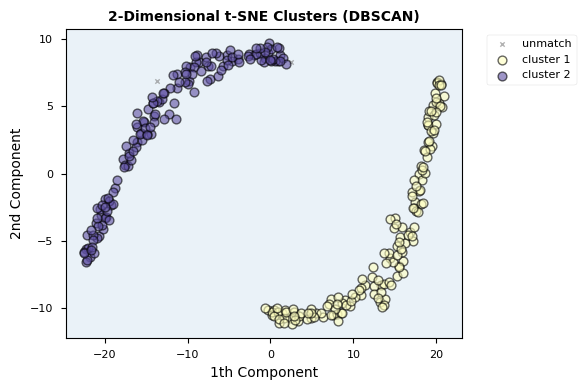

In [104]:
dbscan_moons.predict(projection='2d', graph_save_extension='png')

##### Salvar modelo treinado

In [105]:
dbscan_moons.save()

##### Recuperar modelo treinado

In [106]:
foldername_dbscan_moons = 'demo_dbscan_moons'

In [107]:
dbscan_moons_loaded = asapy.DBSCAN()

In [108]:
dbscan_moons_loaded.load(foldername_dbscan_moons)

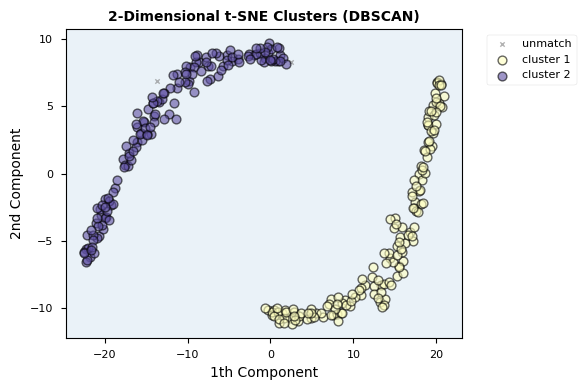

In [109]:
dbscan_moons_loaded.predict()

#### K-Means

##### Uso Simples

###### Dataset Moons

In [110]:
kmeans_moons = asapy.KMeans()

In [111]:
kmeans_moons.build(df_moons)

In [112]:
kmeans_moons.hyperparameter_optimization(search_space_n_clusters=[2])

In [113]:
kmeans_moons.fit()

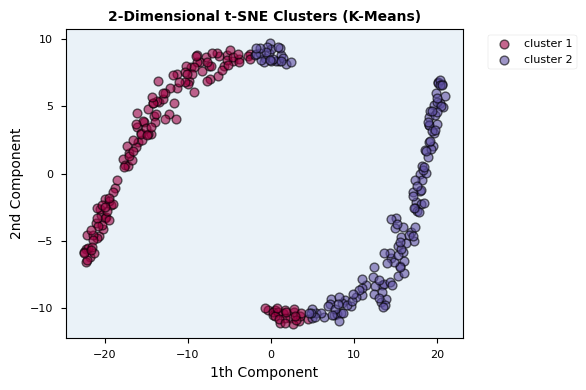

In [114]:
kmeans_moons.predict()

###### Dataset Circles

In [115]:
kmeans_circles = asapy.KMeans()

In [116]:
kmeans_circles.build(df_circles)

In [117]:
kmeans_circles.hyperparameter_optimization(search_space_n_clusters=[2])

In [118]:
kmeans_circles.fit()

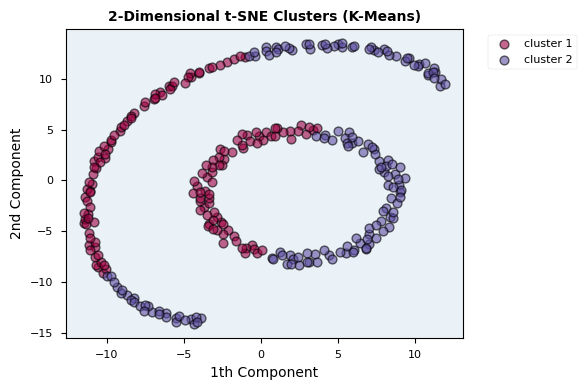

In [119]:
kmeans_circles.predict()

###### Dataset Blobs

In [120]:
kmeans_blobs = asapy.KMeans()

In [121]:
kmeans_blobs.build(df_blobs)

In [122]:
kmeans_blobs.hyperparameter_optimization(search_space_n_clusters=[2])

In [123]:
kmeans_blobs.fit()

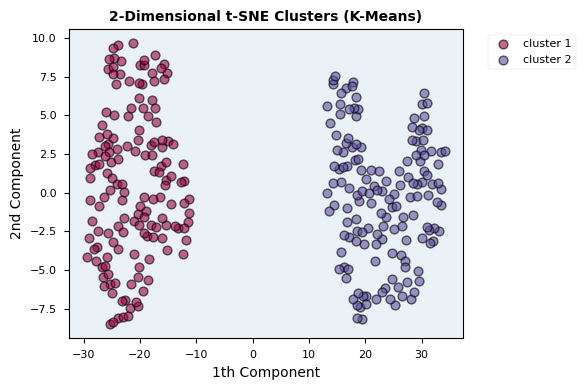

In [124]:
kmeans_blobs.predict()

##### Uso personalizado (uso de argumentos opcionais)

In [125]:
kmeans_blobs = asapy.KMeans(name='demo_kmeans_blobs', seed=25)

In [126]:
kmeans_blobs.build(df_blobs, info=True)


                Total of registers: 300
                Total of valid registers: 300
                Total of invalid registers: 0

                Total of Features: 2
                Numerical Features: ['Feature 1', 'Feature 2']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []
            


In [127]:
kmeans_blobs.hyperparameter_optimization(
    n_trials=10,
    info=True,
    search_space_n_clusters=[2],
    search_space_init  = ['k-means++'],
    search_space_n_init = ['auto'],
    search_space_tol = [1e-5, 1e-4, 1e-3],
    search_space_algorithm = ['lloyd', 'elkan']
)

Trial (nº)  Silhouette Score params_algorithm params_init  \
Ranking                                                              
1º                0          0.670796            elkan   k-means++   
2º                1          0.670796            lloyd   k-means++   
3º                2          0.670796            lloyd   k-means++   
4º                3          0.670796            lloyd   k-means++   
5º                4          0.670796            lloyd   k-means++   
6º                5          0.670796            lloyd   k-means++   
7º                6          0.670796            elkan   k-means++   
8º                7          0.670796            lloyd   k-means++   
9º                8          0.670796            lloyd   k-means++   
10º               9          0.670796            lloyd   k-means++   

         params_n_clusters params_n_init  params_tol  
Ranking                                               
1º                       2          auto     0.00100  
2º                       2          auto     0.00010  
3º                       2          auto     0.00001  
4º                       2          auto     0.00001  
5º                       2          auto     0.00001  
6º                       2          auto     0.00001  
7º                       2          auto     0.00001  
8º                       2          auto     0.00001  
9º                       2          auto     0.00001  
10º                      2          auto     0.00100

In [128]:
clusters = kmeans_blobs.fit(return_cluster=True, verbose=0)

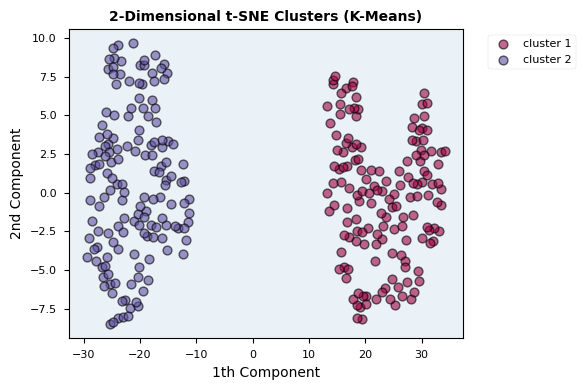

In [129]:
kmeans_blobs.predict(projection='2d', graph_save_extension='png')

##### Salvar modelo treinado

In [130]:
kmeans_blobs.save()

##### Recuperar modelo treinado

In [131]:
foldername_kmeans_blobs = 'demo_kmeans_blobs'

In [132]:
kmeans_blobs_loaded = asapy.KMeans()

In [133]:
kmeans_blobs_loaded.load(foldername_kmeans_blobs)

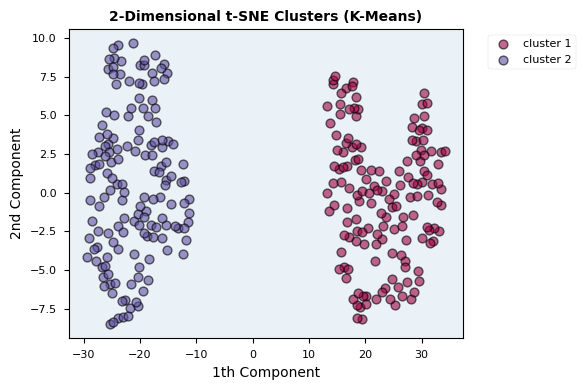

In [134]:
kmeans_blobs_loaded.predict()

### Caso 5: [Iris Species](https://www.kaggle.com/datasets/uciml/iris)

In [135]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
target = iris.target

In [136]:
scaler = StandardScaler()
df_iris_scaled = scaler.fit_transform(df_iris)

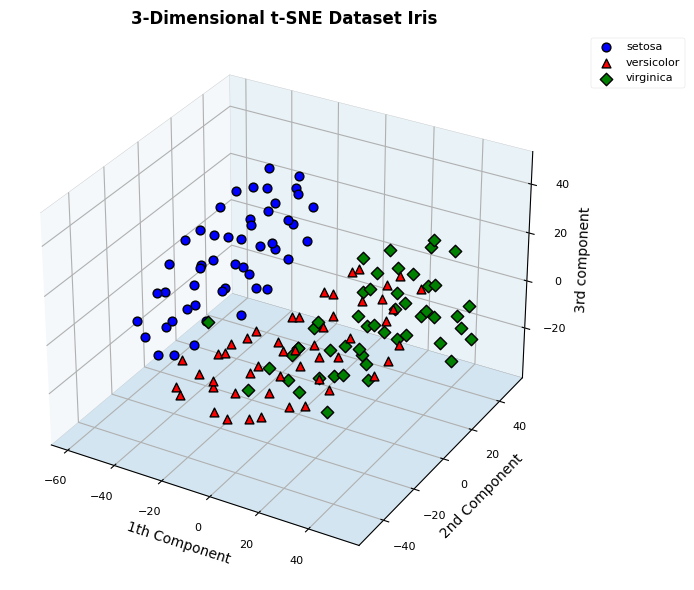

In [137]:
fig = plt.figure(figsize=(8, 6))

tsne = TSNE(n_components=3)
X_reduced = tsne.fit_transform(df_iris_scaled)

markers = ['o', '^', 'D']
colors = ['blue', 'red', 'green']

ax = fig.add_subplot(111, projection='3d')
ax.set_title('3-Dimensional t-SNE Dataset Iris', fontweight='bold', fontsize=12)
ax.set_zlabel('3rd component', fontsize=10)

for i in np.unique(iris.target):

    ax.scatter(
        X_reduced[target == i, 0],
        X_reduced[target == i, 1],
        X_reduced[target == i, 2],
        edgecolor='k',
        color=colors[i],
        s=40,
        # alpha=0.6,
        linewidths=1,
        depthshade=False,
        marker=markers[i],
        label=iris.target_names[i]
    )

ax.xaxis.pane.set_edgecolor('gray')
ax.yaxis.pane.set_edgecolor('gray')
ax.zaxis.pane.set_edgecolor('gray')
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True
ax.xaxis.pane.set_facecolor('#EAF2F8')
ax.yaxis.pane.set_facecolor('#D4E6F1')
ax.zaxis.pane.set_facecolor('#A9CCE3')

ax.set_xlabel('1th Component', fontsize=10)
ax.set_ylabel('2nd Component', fontsize=10)

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), frameon=True, framealpha=0.9, facecolor='white')

ax.grid(True)

plt.tight_layout()
plt.show()
plt.close()

#### DBSCAN

##### Uso Simples

In [138]:
dbscan_iris = asapy.DBSCAN()

In [139]:
dbscan_iris.build(df_iris)

In [140]:
dbscan_iris.hyperparameter_optimization()

In [141]:
dbscan_iris.fit()

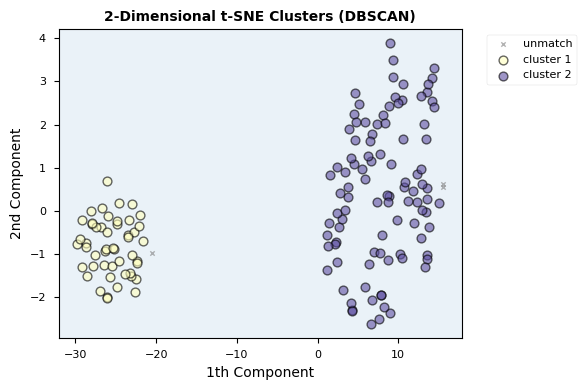

In [142]:
dbscan_iris.predict()

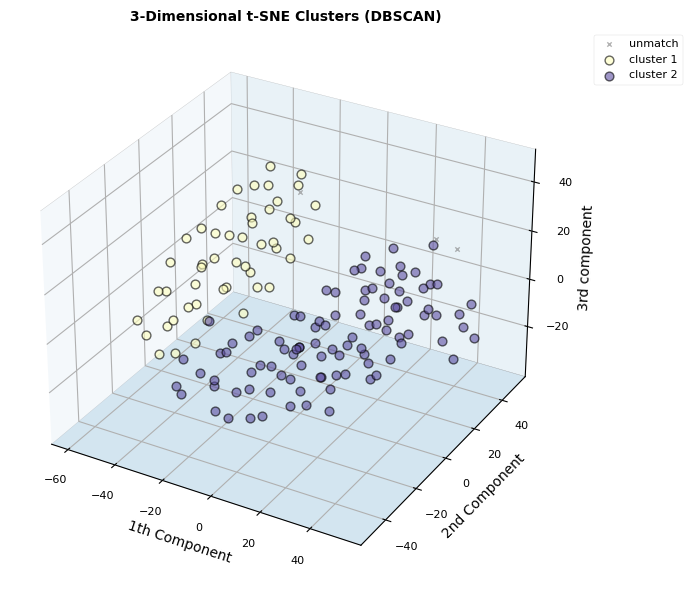

In [143]:
dbscan_iris.predict(projection='3d')

##### Uso personalizado (uso de argumentos opcionais)

In [144]:
dbscan_iris = asapy.DBSCAN(name='demo_dbscan_iris', seed=25)

In [145]:
dbscan_iris.build(df_iris, info=True)


                Total of registers: 150
                Total of valid registers: 150
                Total of invalid registers: 0

                Total of Features: 4
                Numerical Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []
            


In [146]:
dbscan_iris.hyperparameter_optimization(
    n_trials=100,
    info=True,
    search_space_eps = [0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 1],
    search_space_min_samples = [3, 4, 5, 6, 7],
    search_space_algorithm = ['auto'],
    search_space_leaf_size = [10, 20, 30, 40, 50],
    search_space_p = [2]
)

Trial (nº)  Silhouette Score params_algorithm  params_eps  \
Ranking                                                              
1º               99          0.538288             auto         1.0   
2º               53          0.538288             auto         1.0   
3º               33          0.538288             auto         1.0   
4º               35          0.538288             auto         1.0   
5º               74          0.538288             auto         1.0   
...             ...               ...              ...         ...   
96º              15         -1.000000             auto         0.1   
97º              79         -1.000000             auto         0.1   
98º              30         -1.000000             auto         0.1   
99º              64         -1.000000             auto         0.1   
100º             49         -1.000000             auto         0.1   

         params_leaf_size  params_min_samples  params_p  
Ranking                                                  
1º                     10                   6         2  
2º                     50                   6         2  
3º                     40                   6         2  
4º                     30                   6         2  
5º                     30                   6         2  
...                   ...                 ...       ...  
96º                    30                   4         2  
97º                    50                   6         2  
98º                    50                   3         2  
99º                    10                   6         2  
100º                   40                   4         2  

[100 rows x 7 columns]

In [147]:
clusters = dbscan_iris.fit(return_cluster=True)

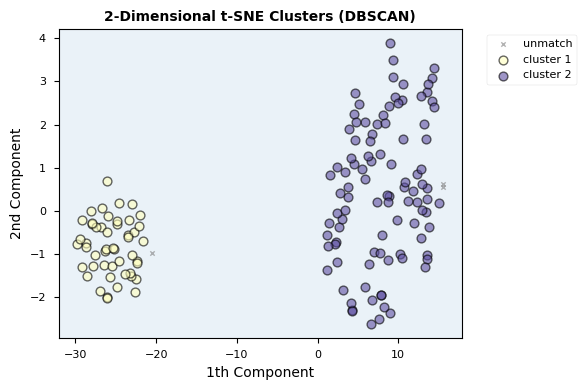

In [148]:
dbscan_iris.predict(projection='2d', graph_save_extension='png')

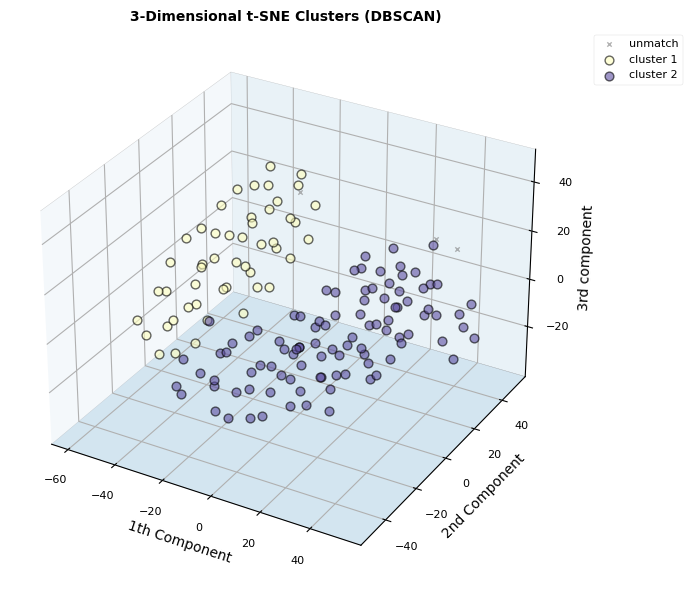

In [149]:
dbscan_iris.predict(projection='3d', graph_save_extension='png')

##### Salvar modelo treinado

In [150]:
dbscan_iris.save()

##### Recuperar modelo treinado

In [151]:
foldername_dbscan_iris = 'demo_dbscan_iris'

In [152]:
dbscan_iris_loaded = asapy.DBSCAN()

In [153]:
dbscan_iris_loaded.load(foldername_dbscan_iris)

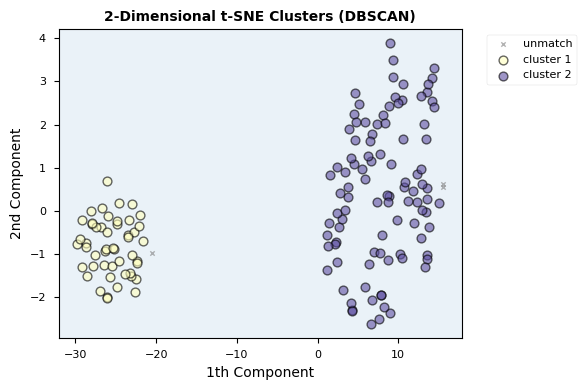

In [154]:
dbscan_iris_loaded.predict()

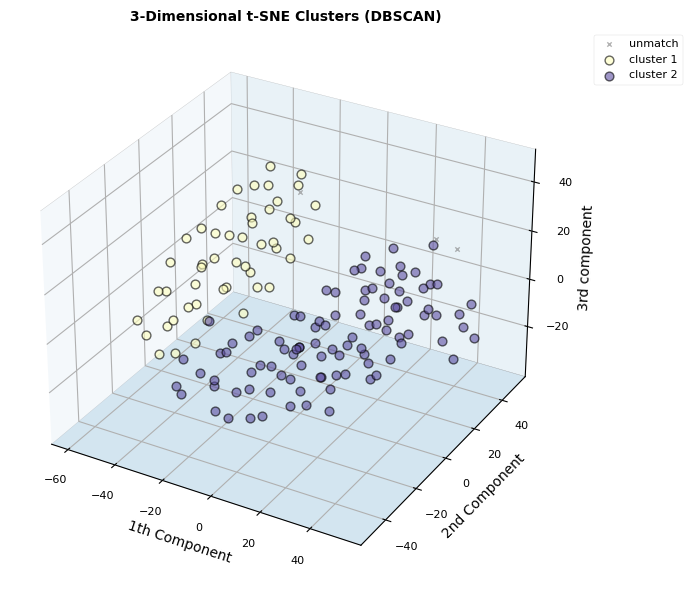

In [155]:
dbscan_iris_loaded.predict(projection='3d')

#### K-Means

##### Uso Simples

In [156]:
kmeans_iris = asapy.KMeans()

In [157]:
kmeans_iris.build(df_iris)

In [158]:
kmeans_iris.hyperparameter_optimization(search_space_n_clusters=[3])

In [159]:
kmeans_iris.fit()

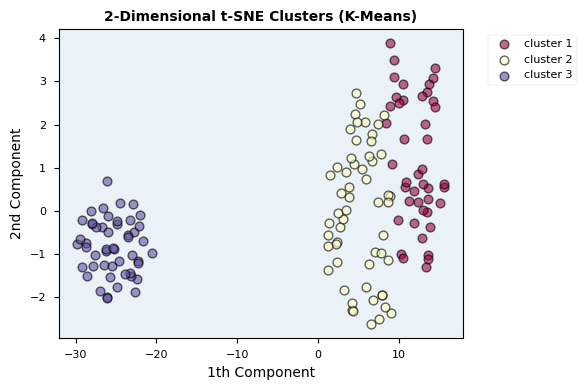

In [160]:
kmeans_iris.predict()

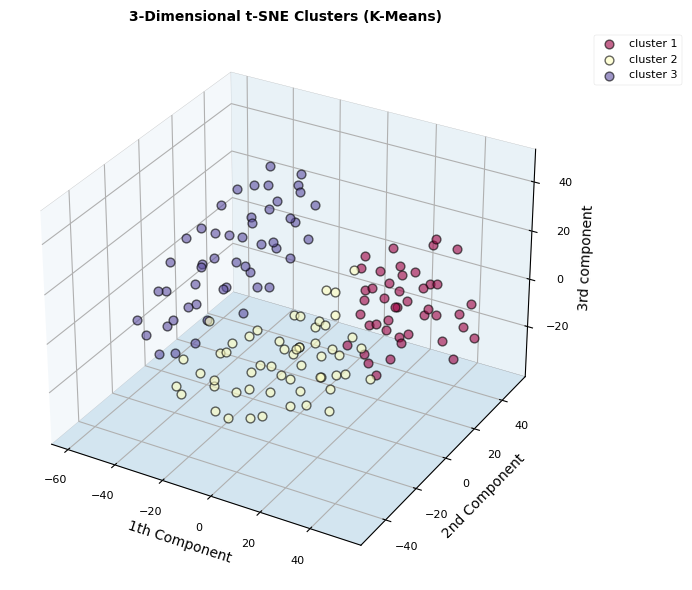

In [161]:
kmeans_iris.predict(projection='3d')

##### Uso personalizado (uso de argumentos opcionais)

In [162]:
kmeans_iris = asapy.KMeans(name='demo_kmeans_iris', seed=25)

In [163]:
kmeans_iris.build(df_iris, info=True)


                Total of registers: 150
                Total of valid registers: 150
                Total of invalid registers: 0

                Total of Features: 4
                Numerical Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []
            


In [164]:
kmeans_iris.hyperparameter_optimization(
    n_trials=10,
    info=True,
    search_space_n_clusters=[3],
    search_space_init  = ['k-means++'],
    search_space_n_init = ['auto'],
    search_space_tol = [1e-5, 1e-4, 1e-3],
    search_space_algorithm = ['lloyd', 'elkan']
)

Trial (nº)  Silhouette Score params_algorithm params_init  \
Ranking                                                              
1º                0          0.456535            elkan   k-means++   
2º                1          0.456535            elkan   k-means++   
3º                2          0.456535            elkan   k-means++   
4º                3          0.456535            elkan   k-means++   
5º                4          0.456535            elkan   k-means++   
6º                5          0.456535            lloyd   k-means++   
7º                6          0.456535            elkan   k-means++   
8º                7          0.456535            lloyd   k-means++   
9º                8          0.456535            elkan   k-means++   
10º               9          0.456535            elkan   k-means++   

         params_n_clusters params_n_init  params_tol  
Ranking                                               
1º                       3          auto     0.00100  
2º                       3          auto     0.00010  
3º                       3          auto     0.00010  
4º                       3          auto     0.00100  
5º                       3          auto     0.00010  
6º                       3          auto     0.00010  
7º                       3          auto     0.00001  
8º                       3          auto     0.00100  
9º                       3          auto     0.00001  
10º                      3          auto     0.00100

In [165]:
clusters = kmeans_iris.fit(return_cluster=True)

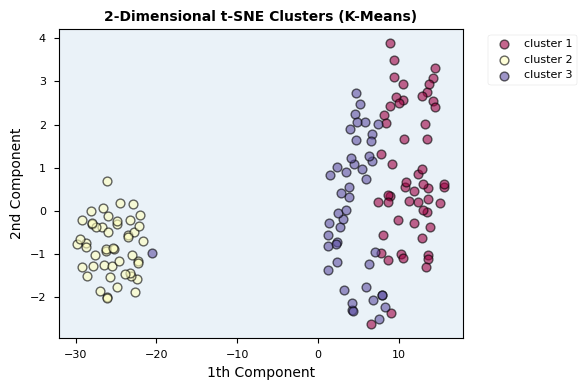

In [166]:
kmeans_iris.predict(projection='2d', graph_save_extension='png')

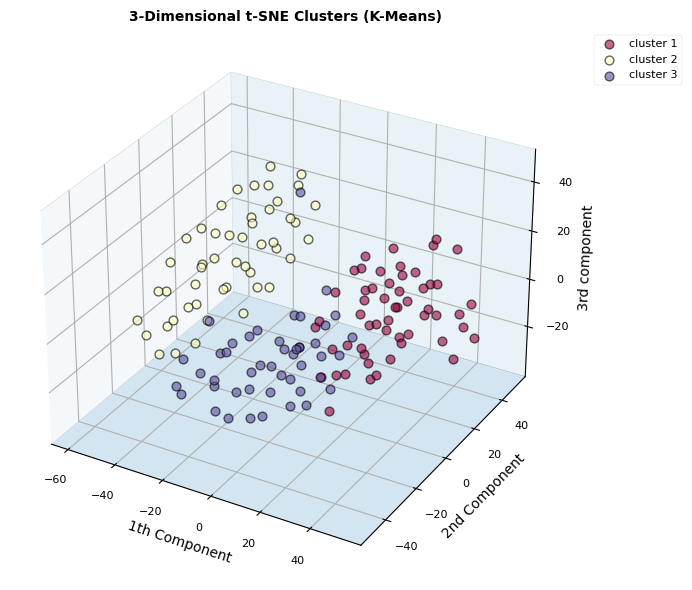

In [167]:
kmeans_iris.predict(projection='3d', graph_save_extension='png')

##### Salvar modelo treinado

In [168]:
kmeans_iris.save()

##### Recuperar modelo treinado

In [169]:
foldername_kmeans_iris = 'demo_kmeans_iris'

In [170]:
kmeans_iris_loaded = asapy.DBSCAN()

In [171]:
kmeans_iris_loaded.load(foldername_kmeans_iris)

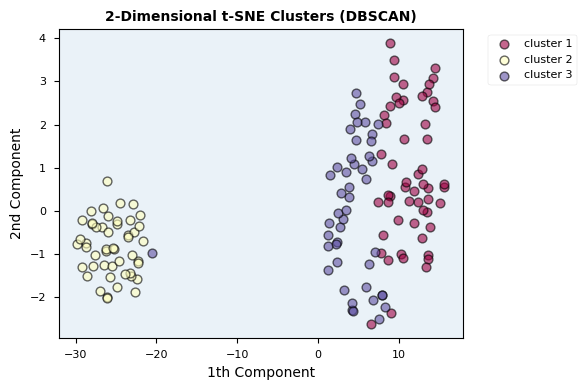

In [172]:
kmeans_iris_loaded.predict()

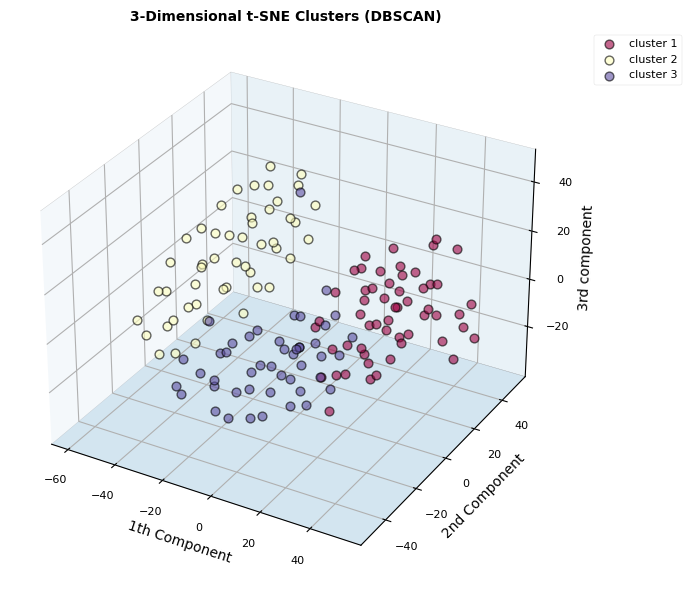

In [173]:
kmeans_iris_loaded.predict(projection='3d')

### Caso 6: [Titanic](https://www.kaggle.com/competitions/titanic)

In [174]:
df_titanic = load_dataset('titanic')
df_titanic.drop(columns=['deck', 'age'], inplace=True)
df_titanic.dropna(inplace=True)

In [175]:
sample_titanic = df_titanic.sample(5)
df_titanic.drop(sample_titanic.index, inplace=True)

In [176]:
df_titanic.head(5)

survived  pclass     sex  sibsp  parch     fare embarked  class    who  \
0         0       3    male      1      0   7.2500        S  Third    man   
1         1       1  female      1      0  71.2833        C  First  woman   
2         1       3  female      0      0   7.9250        S  Third  woman   
3         1       1  female      1      0  53.1000        S  First  woman   
4         0       3    male      0      0   8.0500        S  Third    man   

   adult_male  embark_town alive  alone  
0        True  Southampton    no  False  
1       False    Cherbourg   yes  False  
2       False  Southampton   yes   True  
3       False  Southampton   yes  False  
4        True  Southampton    no   True

#### DBSCAN

##### Uso Simples

In [177]:
dbscan_titanic = asapy.DBSCAN()

In [178]:
dbscan_titanic.build(df_titanic)

In [179]:
dbscan_titanic.hyperparameter_optimization()

In [180]:
dbscan_titanic.fit()

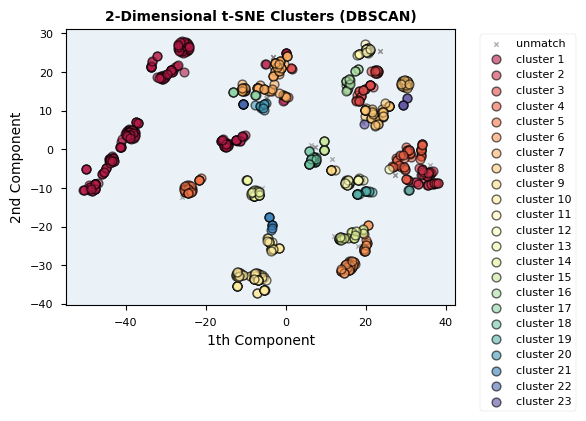

In [181]:
dbscan_titanic.predict()

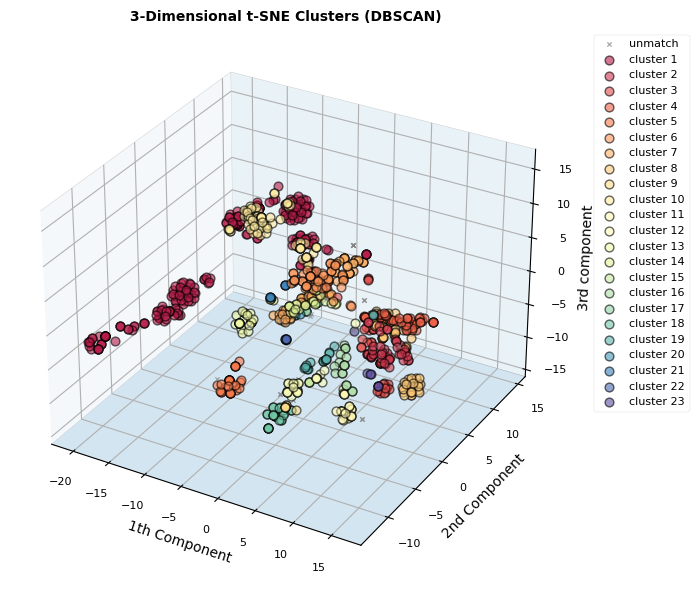

In [182]:
dbscan_titanic.predict(projection='3d')

##### Uso personalizado (uso de argumentos opcionais)

In [183]:
dbscan_titanic = asapy.DBSCAN(name='demo_dbscan_titanic', seed=25)

In [184]:
dbscan_titanic.build(df_titanic, info=True)


                Total of registers: 884
                Total of valid registers: 884
                Total of invalid registers: 0

                Total of Features: 13
                Numerical Features: ['survived', 'pclass', 'sibsp', 'parch', 'fare']
                Categorical Features: ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']
                Categorical Features removed due to high cardinality: []
            


In [185]:
dbscan_titanic.hyperparameter_optimization(
    n_trials=100,
    info=True,
    search_space_eps = [0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 1],
    search_space_min_samples = [3, 4, 5, 6, 7],
    search_space_algorithm = ['auto'],
    search_space_leaf_size = [10, 20, 30, 40, 50],
    search_space_p = [2]
)

Trial (nº)  Silhouette Score params_algorithm  params_eps  \
Ranking                                                              
1º               25          0.422331             auto         0.1   
2º               51          0.422331             auto         0.1   
3º               60          0.422331             auto         0.1   
4º               71          0.422331             auto         0.1   
5º               84          0.422331             auto         0.1   
...             ...               ...              ...         ...   
96º               1         -1.000000             auto         0.6   
97º              55         -1.000000             auto         0.3   
98º              57         -1.000000             auto         0.7   
99º              58         -1.000000             auto         0.4   
100º             99         -1.000000             auto         0.5   

         params_leaf_size  params_min_samples  params_p  
Ranking                                                  
1º                     30                   5         2  
2º                     10                   6         2  
3º                     50                   6         2  
4º                     50                   6         2  
5º                     50                   6         2  
...                   ...                 ...       ...  
96º                    20                   4         2  
97º                    30                   7         2  
98º                    10                   4         2  
99º                    50                   6         2  
100º                   40                   6         2  

[100 rows x 7 columns]

In [186]:
clusters = dbscan_titanic.fit(return_cluster=True)

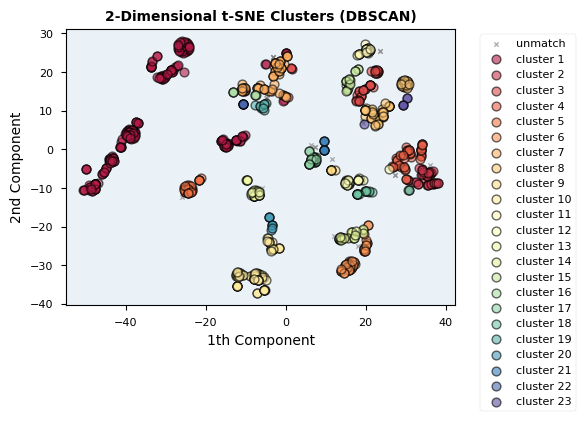

In [187]:
dbscan_titanic.predict(projection='2d', graph_save_extension='png')

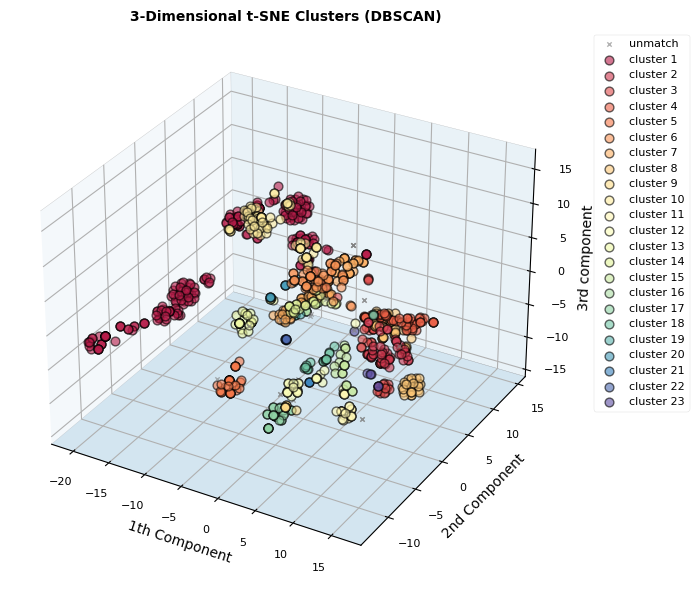

In [188]:
dbscan_titanic.predict(projection='3d', graph_save_extension='png')

##### Salvar modelo treinado

In [189]:
dbscan_titanic.save()

##### Recuperar modelo treinado

In [190]:
foldername_dbscan_titanic = 'demo_dbscan_titanic'

In [191]:
dbscan_titanic_loaded = asapy.DBSCAN()

In [192]:
dbscan_titanic_loaded.load(foldername_dbscan_titanic)

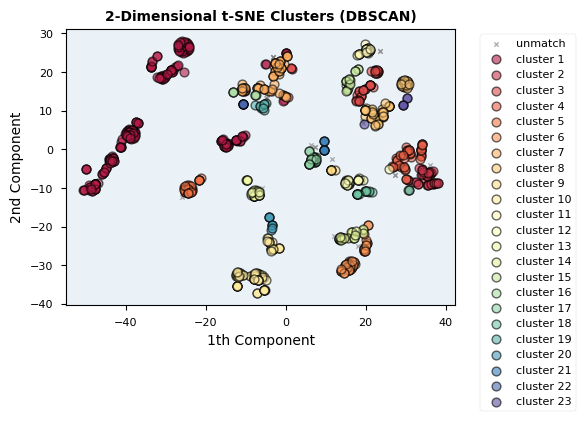

In [193]:
dbscan_titanic_loaded.predict()

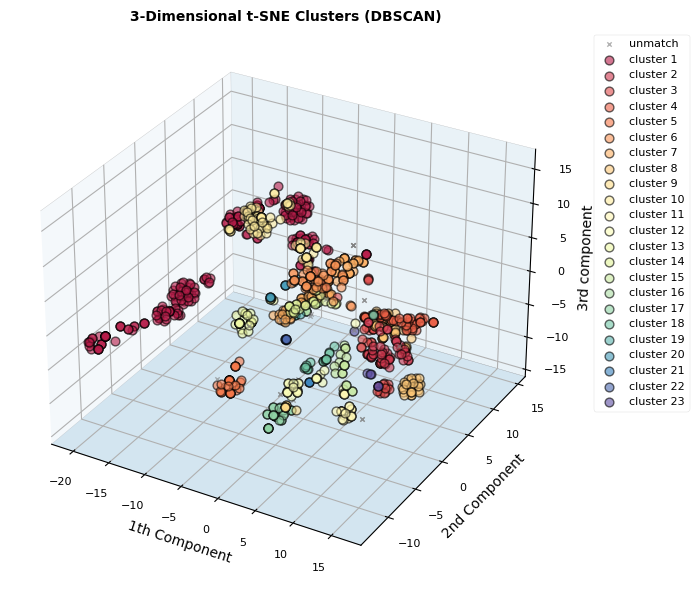

In [194]:
dbscan_titanic_loaded.predict(projection='3d')

#### K-Means

##### Uso Simples

In [195]:
kmeans_titanic = asapy.KMeans()

In [196]:
kmeans_titanic.build(df_titanic)

In [197]:
kmeans_titanic.hyperparameter_optimization(search_space_n_clusters=[2])

In [198]:
kmeans_titanic.fit()

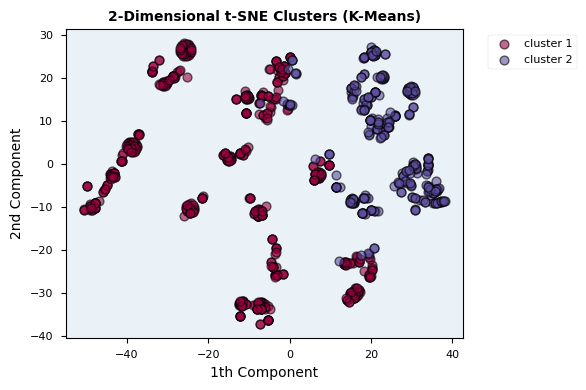

In [199]:
kmeans_titanic.predict()

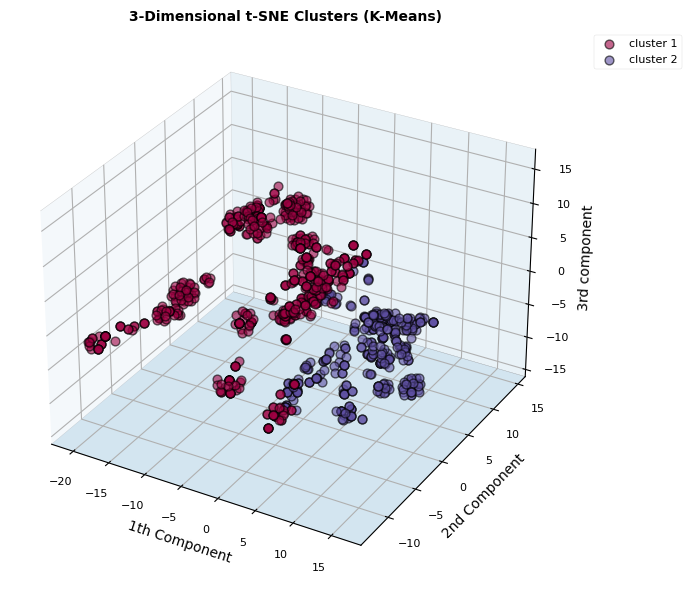

In [200]:
kmeans_titanic.predict(projection='3d')

##### Uso personalizado (uso de argumentos opcionais)

In [201]:
kmeans_titanic = asapy.KMeans(name='demo_kmeans_titanic', seed=25)

In [202]:
kmeans_titanic.build(df_titanic, info=True)


                Total of registers: 884
                Total of valid registers: 884
                Total of invalid registers: 0

                Total of Features: 13
                Numerical Features: ['survived', 'pclass', 'sibsp', 'parch', 'fare']
                Categorical Features: ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']
                Categorical Features removed due to high cardinality: []
            


In [203]:
kmeans_titanic.hyperparameter_optimization(
    n_trials=10,
    info=True,
    search_space_n_clusters=[2],
    search_space_init  = ['k-means++'],
    search_space_n_init = ['auto'],
    search_space_tol = [1e-5, 1e-4, 1e-3],
    search_space_algorithm = ['lloyd', 'elkan']
)

Trial (nº)  Silhouette Score params_algorithm params_init  \
Ranking                                                              
1º                0          0.312836            elkan   k-means++   
2º                1          0.312836            elkan   k-means++   
3º                2          0.312836            lloyd   k-means++   
4º                3          0.312836            elkan   k-means++   
5º                4          0.312836            lloyd   k-means++   
6º                5          0.312836            lloyd   k-means++   
7º                6          0.312836            lloyd   k-means++   
8º                7          0.312836            elkan   k-means++   
9º                8          0.312836            lloyd   k-means++   
10º               9          0.312836            lloyd   k-means++   

         params_n_clusters params_n_init  params_tol  
Ranking                                               
1º                       2          auto     0.00010  
2º                       2          auto     0.00100  
3º                       2          auto     0.00010  
4º                       2          auto     0.00001  
5º                       2          auto     0.00001  
6º                       2          auto     0.00010  
7º                       2          auto     0.00001  
8º                       2          auto     0.00010  
9º                       2          auto     0.00001  
10º                      2          auto     0.00001

In [204]:
clusters = kmeans_titanic.fit(return_cluster=True)

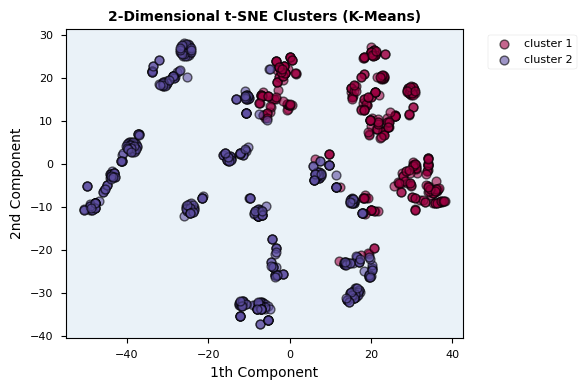

In [205]:
kmeans_titanic.predict(projection='2d', graph_save_extension='png')

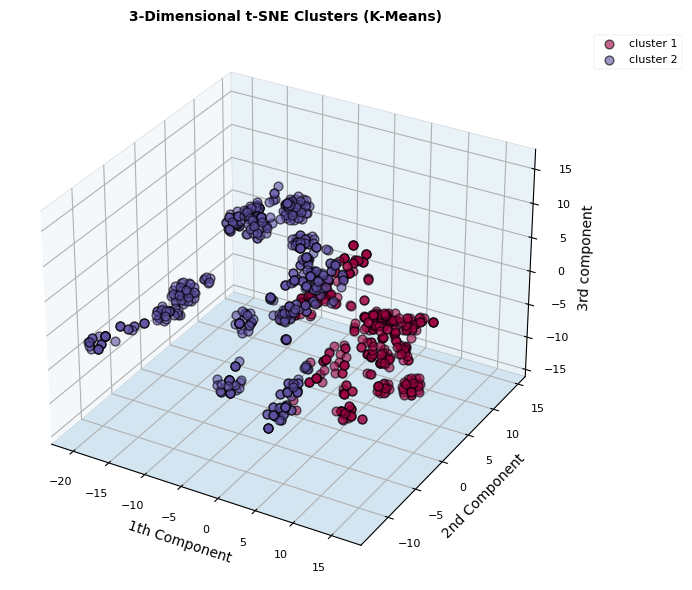

In [206]:
kmeans_titanic.predict(projection='3d', graph_save_extension='png')

##### Salvar modelo treinado

In [207]:
kmeans_titanic.save()

##### Recuperar modelo treinado

In [208]:
foldername_kmeans_titanic = 'demo_kmeans_titanic'

In [209]:
kmeans_titanic_loaded = asapy.KMeans()

In [210]:
kmeans_titanic_loaded.load(foldername_kmeans_titanic)

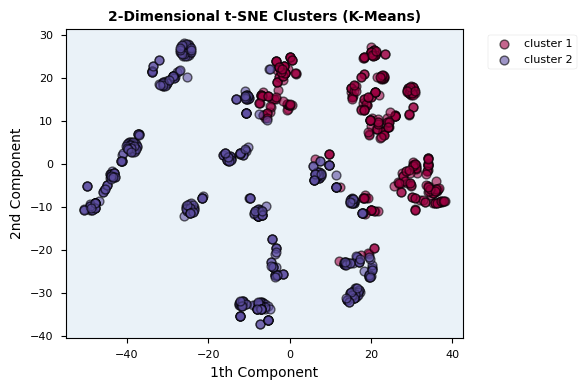

In [211]:
kmeans_titanic_loaded.predict()

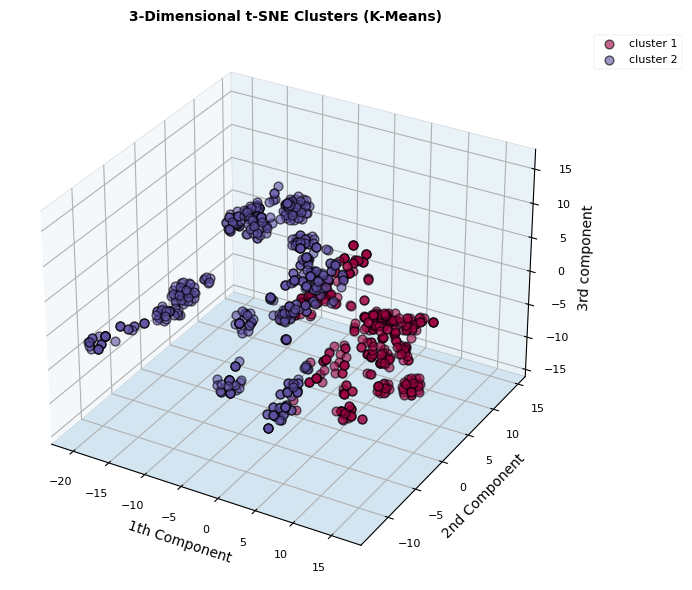

In [212]:
kmeans_titanic_loaded.predict(projection='3d')